In [1]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
#import plotly.graph_objects as go
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib.ticker import MaxNLocator
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from time import process_time 
from src.FunctionsProperties import *
from itertools import combinations
from scipy.optimize import curve_fit
from numpy.linalg import inv
import statsmodels.api as sm
from matplotlib.lines import Line2D
from matplotlib import cm
plt.style.use('properties.mplstyle')

In [7]:
make_results_folders()

In [2]:
df = pd.read_csv("../../data/all_data.txt", delimiter=" ")
df.head()

,N,dim,alpha_a,alpha_g,N_samples,short_mean,short_err,short_err_per,diameter_mean,diameter_err,diameter_err_per,ass_coeff_mean,ass_coeff_err,ass_coeff_err_per
0,5000,4,13.0,2.0,60952,12.712090,0.002927,0.023023,30.373523,0.009610,0.031639,-0.000145,0.000060,41.836001
1,5000,3,12.0,2.0,40912,13.292194,0.003339,0.025119,31.513981,0.011763,0.037325,-0.000052,0.000072,139.980567
2,5000,4,7.5,2.0,30996,11.503357,0.004193,0.036450,27.971222,0.012988,0.046434,-0.036049,0.000088,0.245332
3,5000,2,6.5,2.0,28277,13.366251,0.004089,0.030594,31.977897,0.014946,0.046737,-0.007291,0.000088,1.201787
4,10000,4,12.0,2.0,24310,13.786958,0.004756,0.034496,33.228754,0.015503,0.046654,0.000701,0.000074,10.546518


In [7]:
import numpy as np
import pandas as pd
import re
from pathlib import Path

# Regex e coleta dos diretórios válidos
pattern = re.compile(r'N_(\d+)/dim_(\d+)/alpha_a_([\d.]+)_alpha_g_([\d.]+)')

base_dir = Path("../../../data")
resultados = []

for path in base_dir.rglob('*'):
    if path.is_dir():
        match = pattern.search(str(path))
        if match:
            N_val = int(match.group(1))
            dim_val = int(match.group(2))
            alpha_a_val = float(match.group(3))
            alpha_g_val = float(match.group(4))
            resultados.append({'N': N_val, 'dim': dim_val, 'alpha_a': alpha_a_val, 'alpha_g': alpha_g_val})

# Conjunto com as combinações de resultados (para busca rápida)
resultados_set = set(
    (r['N'], r['dim'], round(r['alpha_a'], 2), r['alpha_g']) for r in resultados
)

# ---- BLOCO MODIFICADO COMO VOCÊ QUER ----

alpha = np.arange(0.0, 16.0, 0.25)
N_list = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
count = 0.0
alpha_a = []
dim = []
N = []
for n in N_list:
    for d in [1, 2, 3, 4]:
        # Alpha_d para esse N, dim e alpha_g=2.0
        alpha_d = np.sort(
            df[(df["N"] == n) & (df["alpha_g"] == 2.0) & (df["dim"] == d)]["alpha_a"].unique()
        )

        for aa in alpha:
            if aa not in alpha_d:
                # Para cada alpha_a ausente no df, verificar se existe nos resultados brutos
                comb = (n, d, round(aa, 2), 2.0)  # alpha_g = 2.0 fixo
                if comb not in resultados_set:
                    print(f"N={n}, dim={d}, alpha_a={aa:.2f}, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados")
                    N.append(int(n))
                    alpha_a.append(float(aa))
                    dim.append(int(d))
                    count += 1

N=5000, dim=1, alpha_a=11.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=1, alpha_a=13.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=1, alpha_a=15.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=11.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=11.50, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=11.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=2, alpha_a=15.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=11.50, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=11.75, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=12.50, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=13.25, alpha_g=2.0 -> NÃO EXISTE nem no df nem nos resultados
N=5000, dim=3, alpha_a=14.25, alpha_g=2.0 -> NÃO EXISTE nem no df

In [8]:
N = [5000, 10000, 20000, 40000, 80000, 100000, 160000, 320000]
dim = [1,2,3,4]
alpha_filter = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
parameters_calculate(df, N, dim, alpha_filter)

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_G$ FOR MULTIPLIES $N$

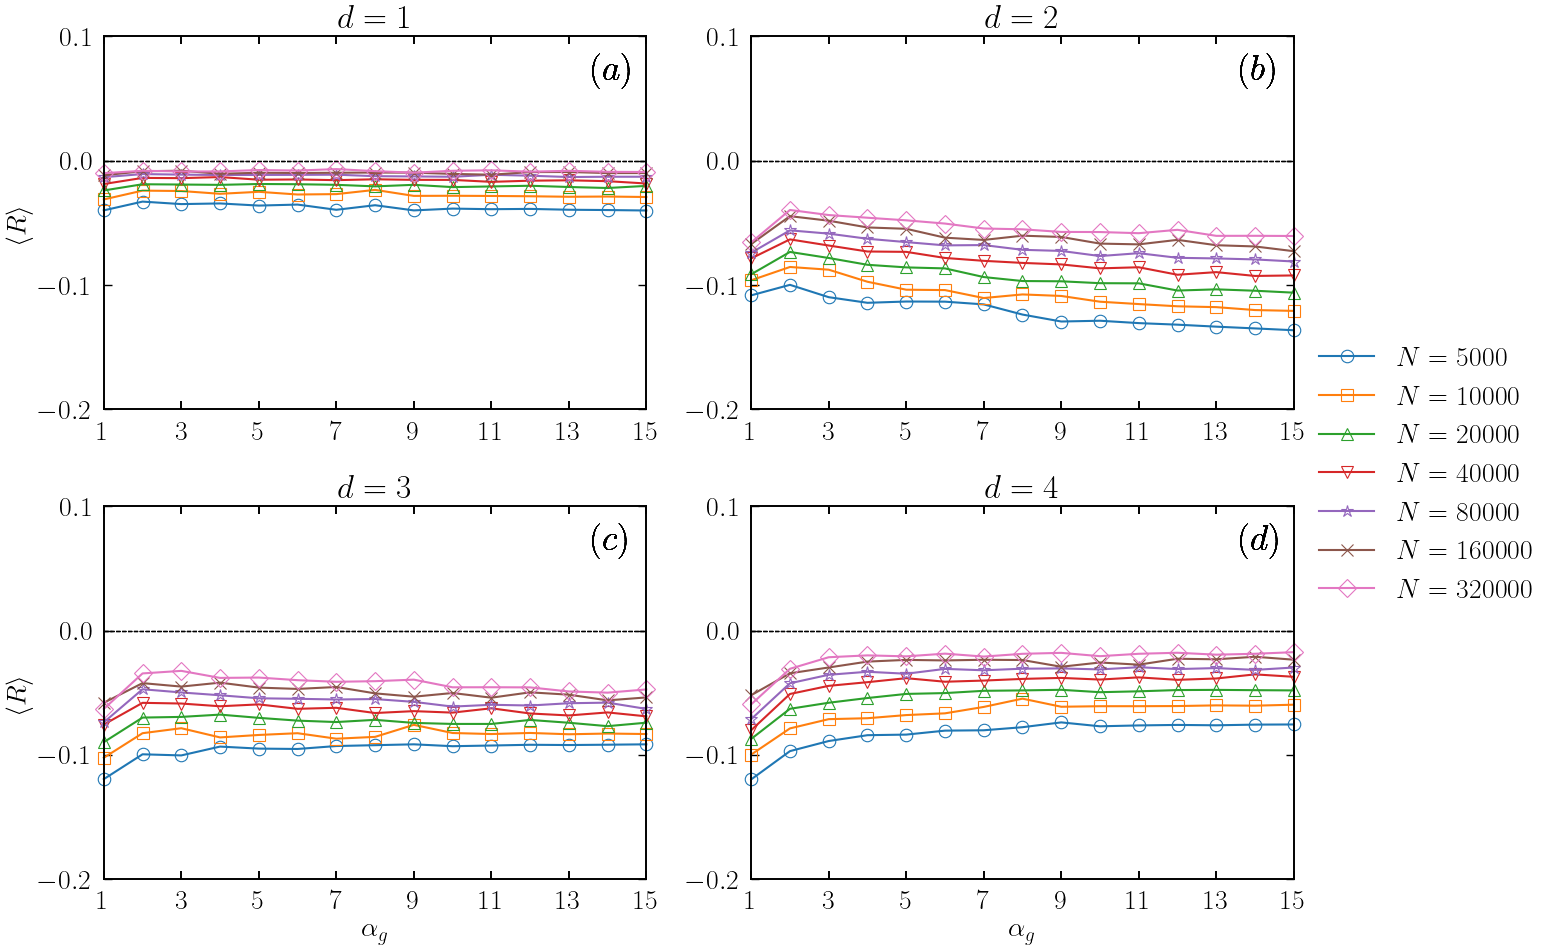

In [9]:
#R/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_g_filter = [i for i in range(0,16)]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
markersize = 9
thickness_axes = 1.4
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
#clip_on=False,
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")
        
        # df_ord = df_ord[df_ord["alpha_g"] <= 15.0]
        df_ord = df_ord[df_ord["alpha_g"].isin(alpha_g_filter)]
        # Cria o gráfico de erro
        # ax.plot(df_ord['alpha_g'], df_ord['ass_coeff_mean']/np.log(N[i]), linestyle='-', marker=markers[i],
        #         label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_g'], df_ord['ass_coeff_mean'], linestyle='-', marker=markers[i], clip_on=False,
                label=labels[i])
        ax.text(x=13.6, y=.065, s=lab[j], fontsize=26, color="black")
        ax.axhline(y=0.0, xmin=0.0, xmax=15.0, linestyle='--', color='k', linewidth=0.8, label='_nolegend_')
    j += 1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([-.2, 0.10])
    #ax.set_ylim([-.02, .02])
    #ax.set_yticks(np.linspace(-0.02, 0.02, 5))  # Apenas 5 ticks no eixo y
    ax.set_title(f"$d = {dim}$")
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$")


# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(left=0.00, right=0.85)

plt.savefig("../../results/alpha_g/R_alpha_g.png", dpi=300)
plt.show()


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


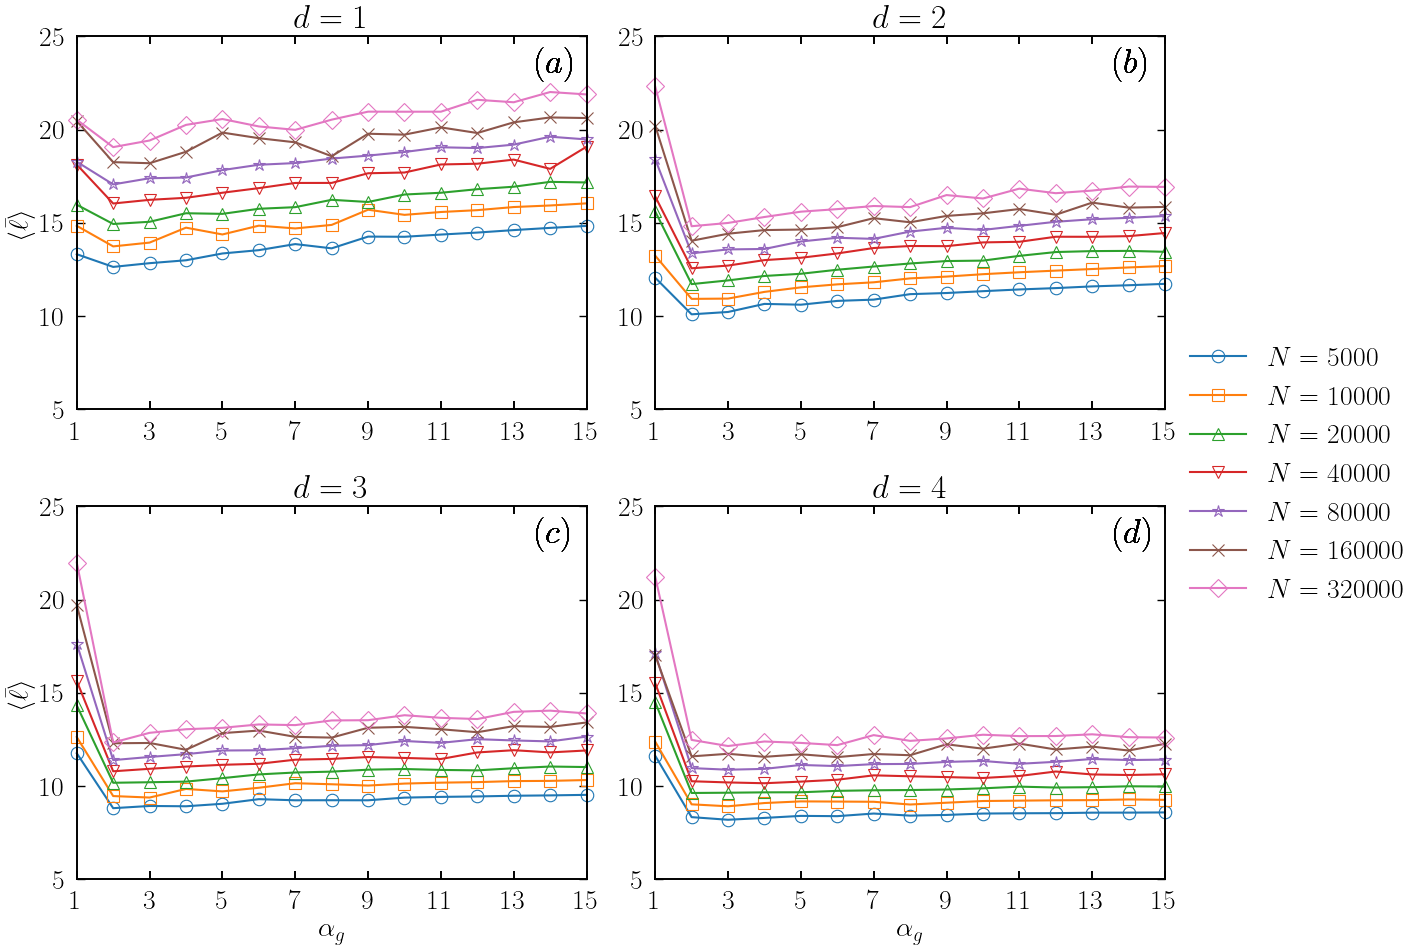

In [10]:
#SHORT/LOG(N) VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_g_filter = [i for i in range(0,16)]
print(alpha_g_filter)
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
#markersize = 9
#thickness_axes = 1.4
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_g = df_dim[df_dim["alpha_a"] == 2]
        df_ord = df_dim_alpha_g.sort_values(by="alpha_g")

        df_ord = df_ord[df_ord["alpha_g"].isin(alpha_g_filter)]
        ax.plot(df_ord['alpha_g'], df_ord['short_mean'], linestyle='-', marker=markers[i], clip_on=False,
                    label=labels[i])
        #ax.text(x=12.2, y=4.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
         #       color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.6, y=23, s=lab[j], fontsize=25, color="black")
        
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([1.0, 15])
    ax.set_ylim([5.0, 25])
    
    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(1))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    ax.set_xticks([1, 3, 5, 7, 9, 11, 13, 15])
    ax.set_title(f"$d = {dim}$")
    # Condições para exibir rótulos dos eixos em subplots específicos
    
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_g$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_g/short_alpha_g.png", dpi=300)
plt.show()

## CALCULATE THE PROPERTIES AS FUNCTION $\alpha_A$ FOR MULTIPLIES $N$

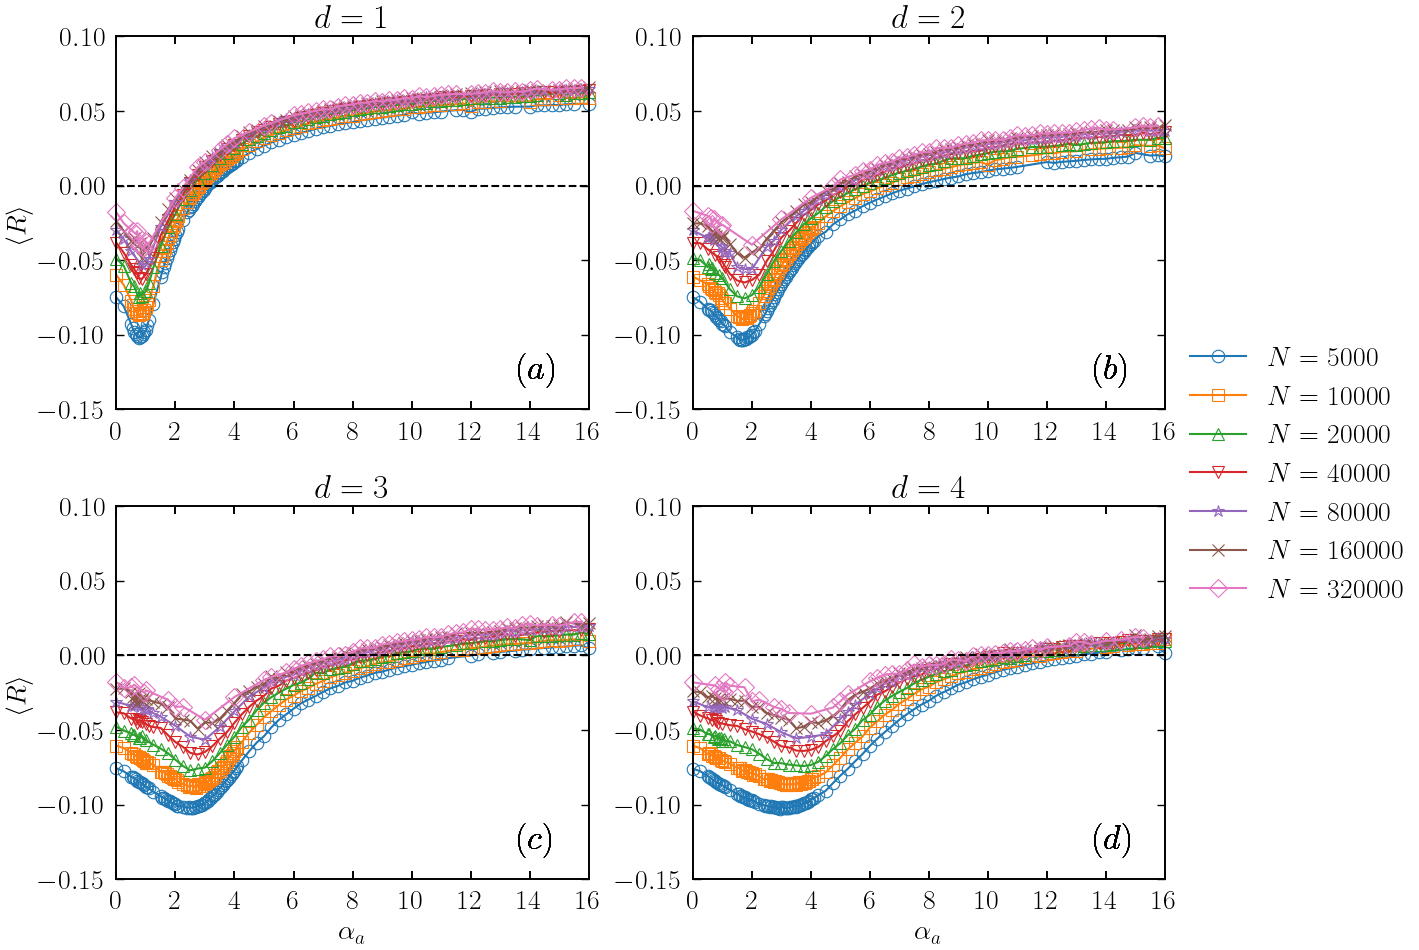

In [11]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_a_filter = np.arange(0.0, 16.25, 0.25)

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        df_ord = df_ord[df_ord["alpha_a"] <= 16.0]
        #df_ord = df_ord[df_ord["alpha_a"].isin(alpha_a_filter)]
        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
        #             yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='-', marker=markers[i], clip_on=False,
                    label=labels[i])
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=12.2, y=-.13, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.6, y=-.13, s=lab[j], fontsize=25, color="black")
    ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 16])
    ax.set_ylim([-.15, .10])
    ax.set_clip_on(True)  # Garante que os elementos dentro do Axes não ultrapassem os limites
    

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    
    ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    ax.set_title(f"$d = {dim}$")
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/R_multi_N_alpha_a.png", dpi=300)
plt.show()

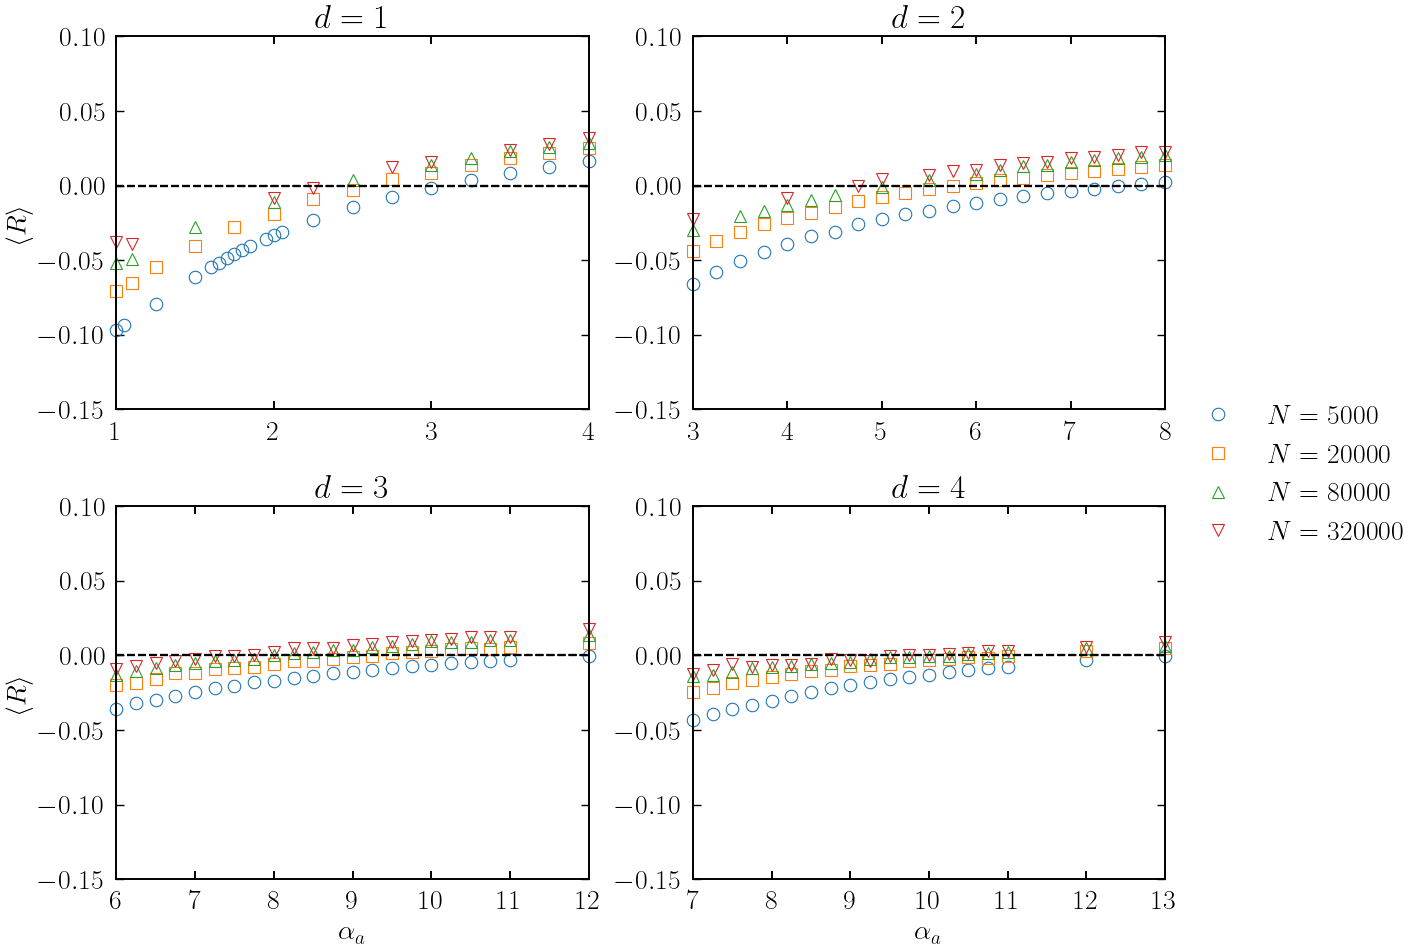

In [14]:
#R VERSUS ALPHA_G WITH MULITPLY N
#N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
N = [5000, 20000,  80000, 320000]

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]
dimensions = [1, 2, 3, 4]

markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

j = 0
x_lim = [(1.0, 4.0), (3.0, 8.0), (6.0, 12.0), (7.0, 13.0)]
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        df_ord = df_ord[(df_ord["alpha_a"] >= x_lim[dim_idx][0]) & (df_ord["alpha_a"] <= x_lim[dim_idx][1])]
        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['ass_coeff_mean'],
        #             yerr=df_ord['ass_coeff_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='none', marker=markers[i], clip_on=False,
                    label=labels[i])
        ax.hlines(y=0.0, xmin=x_lim[dim_idx][0], xmax=x_lim[dim_idx][1], linestyle='--', color='k', label='_nolegend_')
        # ax.text(x=12.2, y=-.13, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        #ax.text(x=13.6, y=-.13, s=lab[j], fontsize=25, color="black")
        ax.set_xlim([x_lim[dim_idx][0], x_lim[dim_idx][1]])
    #ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
    j+=1
    # Define os limites e configurações do eixo x e y
    
    ax.set_ylim([-.15, .10])
    ax.set_clip_on(True)  # Garante que os elementos dentro do Axes não ultrapassem os limites
    

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(1))
    
    #ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
    ax.set_title(f"$d = {dim}$")
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle R \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
#plt.savefig("../../results/alpha_a/R_multi_N_alpha_a.pdf")
plt.show()

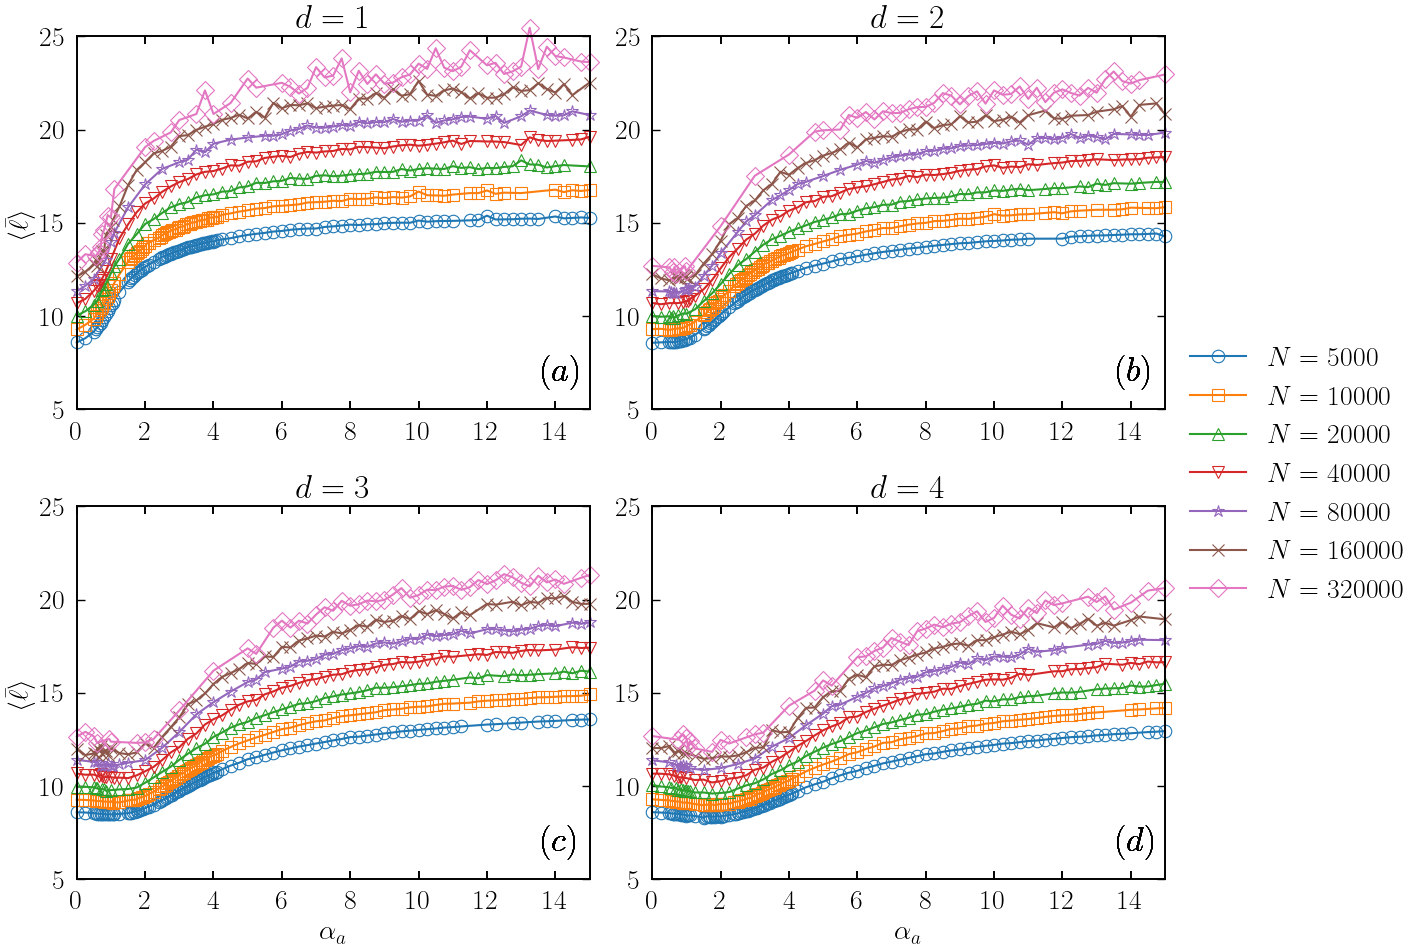

In [12]:
#R VERSUS ALPHA_G WITH MULITPLY N
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

# Configuração da figura e subplots 2x2
alpha_a_filter = np.arange(0.0, 16.25, 0.25)
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Para facilitar o acesso aos subplots com um índice linear
linestyles = ['-' for i in range(len(N))]
labels = [f"$N = {n}$" for n in N]

thickness_axes = 1.4
dimensions = [1, 2, 3, 4]
markers = [
    "o",   # círculo
    "s",   # quadrado
    "^",   # triângulo para cima
    "v",   # triângulo para baixo
    "*",   # estrela
    "x",   # cruz
    "D"    # losango
]

#dim = [1,2,3,4]
j = 0
# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i])]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        df_ord = df_ord[df_ord["alpha_a"] <= 15.0]
        #df_ord = df_ord[df_ord["alpha_a"].isin(alpha_a_filter)]
        # Cria o gráfico de erro
        # ax.errorbar(df_ord['alpha_a'], df_ord['short_mean'],
        #             yerr=df_ord['short_err'], linestyle='-', marker='o',
        #             label=labels[i], markersize=markersize, markerfacecolor='none')
        ax.plot(df_ord['alpha_a'], df_ord['short_mean'], linestyle='-', marker=markers[i], clip_on=False,
            label=labels[i])
        #ax.hlines(y=0.0, xmin=1.0, xmax=14.0, linestyle='--', color='k')
        # ax.text(x=12.4, y=6.5, s=rf"$d$ $=$ ${dim}$", fontsize=19, fontweight="bold", 
        #         color="black",bbox=dict(facecolor=colors[j], edgecolor="black", boxstyle="round,pad=0.2", alpha=.05))
        ax.text(x=13.6, y=6.5, s=lab[j], fontsize=25, color="black")
        ax.set_title(f"$d = {dim}$")
    j+=1
    # Define os limites e configurações do eixo x e y
    ax.set_xlim([0.0, 15])
    ax.set_ylim([5, 25])
    

    # Define os multiplicadores dos ticks no eixo x com um step de 2
    ax.xaxis.set_major_locator(MultipleLocator(2))
    #ax.xaxis.set_minor_locator(MultipleLocator(1))
    #ax.set_xticks([0.0, 3.0, 6.0, 9.0, 12.0, 15.0])

    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:  # Subplots na última linha
        ax.set_xlabel(r"$\alpha_a$")
    if dim_idx % 2 == 0:  # Subplots na primeira coluna
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$")

# Cria uma legenda comum ao lado da figura
fig.legend(labels=labels, fancybox=True, framealpha=0.0,
           loc='center left', bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/alpha_a/short_multi_N_alpha_a.png",dpi=300)
plt.show()

## CALCULATE THE PROPERTIES LINEAR REGRESSION

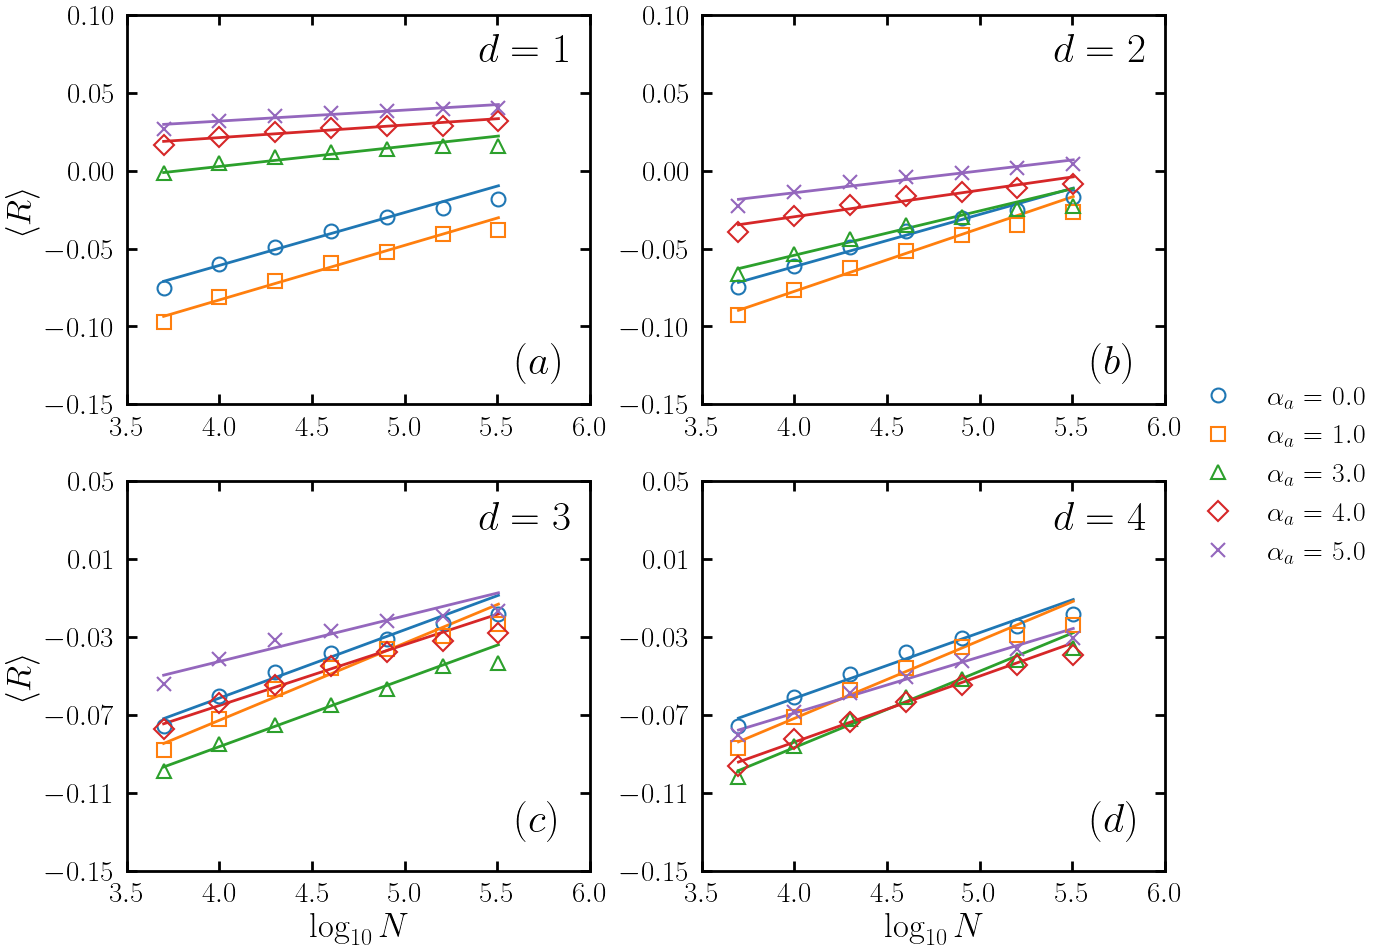

In [19]:
# Dados e configurações
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

markers = ['o', 's', '^', 'D', 'x']
count_box = 0

markersize = 10
thickness_axes = 2.0
mew = 1.5

# Certifique-se de que a variável "lab" esteja definida
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com índice linear


# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico
            if not df_dim_alpha_a.empty:
                N_aux.append(n)
                prop.append(df_dim_alpha_a["ass_coeff_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["ass_coeff_err"].tolist()[0])
        
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        ax.errorbar(np.log10(N_aux), prop, linestyle='None', marker=markers[count],mew=mew,markersize=markersize,
                    label=rf"$\alpha_a$ $=$ ${alpha}$")
        ax.plot(np.log10(N_aux), regression, color=colors[count],linewidth=thickness_axes,label="_nolegend_")
        count += 1
    x_p = 5.6
    x_p_d = 5.4
    # Define a posição do texto para cada subplot
    if dim_idx in [0, 1]:
        y_p = -0.13
        y_p_d = 0.070
    else:
        y_p = -0.13  # Se desejar alterar para outra posição nos subplots inferiores, ajuste aqui.
        y_p_d = 0.025
    
    ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=30, color="black")
    ax.text(x=x_p_d, y=y_p_d, s=f"$d = {dim}$", fontsize=30, color="black")
    count_box += 1
    
    # Define os limites e configurações dos eixos
    ax.set_xlim([3.5, 6])
    if dim_idx < 2:  # Subplots da primeira linha
        ax.set_ylim([-0.15, 0.10])
    else:           # Subplots da segunda linha
        ax.set_ylim([-0.15, 0.05])
        ax.set_yticks(np.linspace(-0.15, 0.05, 6))  # Define 6 ticks igualmente espaçados
    
    # Condições para exibir rótulos dos eixos em subplots específicos
    if dim_idx in [2, 3]:
        ax.set_xlabel(r"$\log_{10}N$", fontsize=25)
    if dim_idx % 2 == 0:
        ax.set_ylabel(r"$\langle R \rangle$", fontsize=25)
    
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)
    
    ax.tick_params(axis='both', which='major', direction='in', length=7, width=2, labelsize=21)
    ax.tick_params(axis='both', which='minor', direction='in', length=4, width=2)
# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot],
           prop={"size": 20}, fancybox=True, framealpha=0.0, loc='center left',
           bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda
plt.savefig("../../results/N/R_linear_N.png", dpi=300)
plt.show()

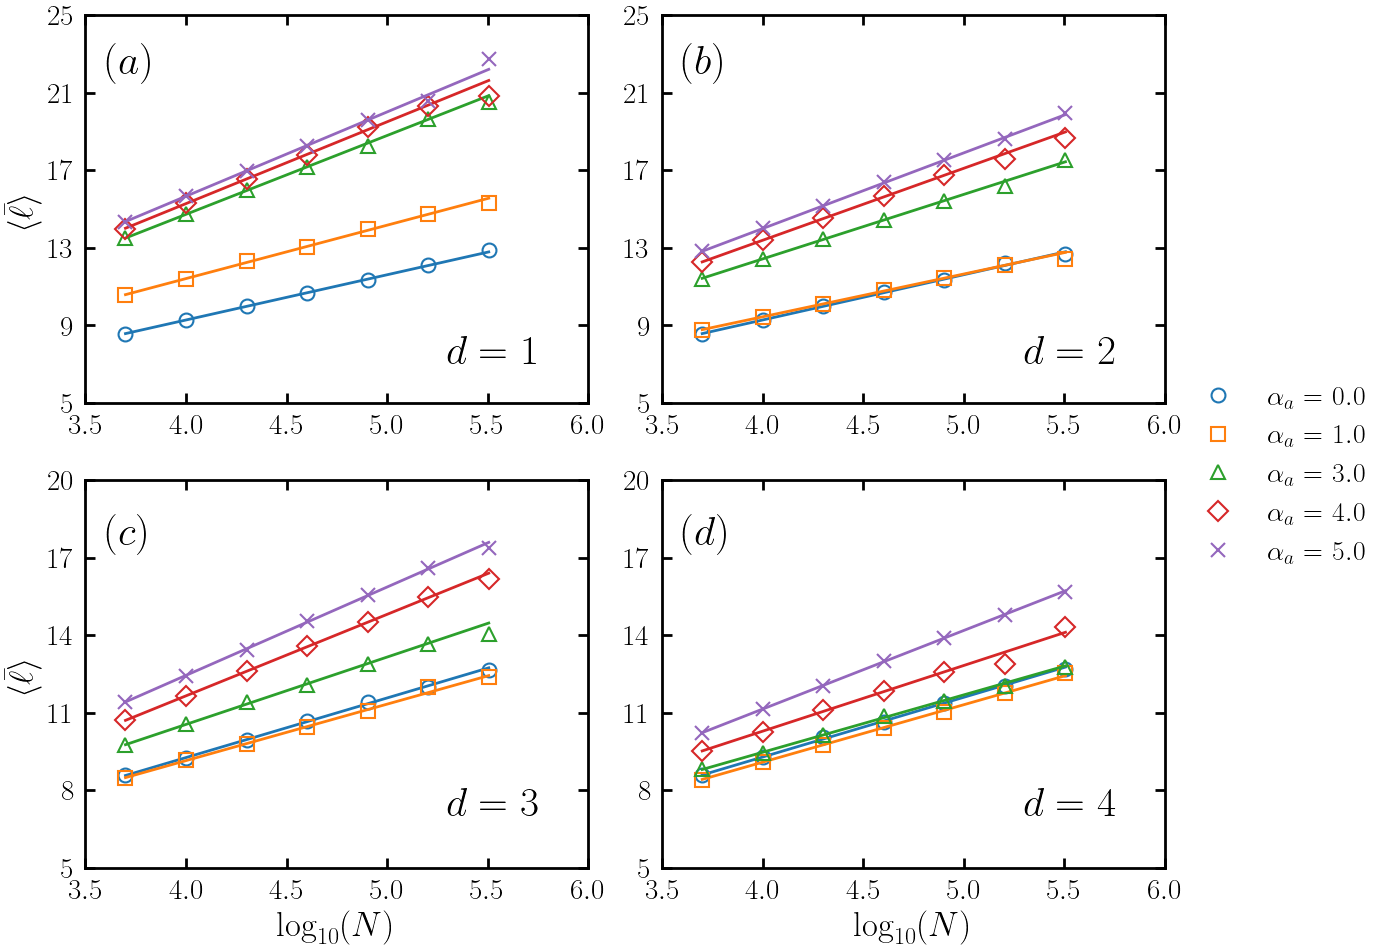

In [31]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
# Cores para os gráficos; note que a lista foi redefinida para 5 cores
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']

colors_box = ["#03AC13", "#00019a", "#fe0000", "orange"]
count_box = 0

# Certifique-se de que a variável "lab" esteja definida, por exemplo:
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
markers = ['o', 's', '^', 'D', 'x']

markersize = 10
thickness_axes = 2.0
mew = 1.5

# Configuração da figura e subplots 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()  # Facilita o acesso aos subplots com um índice linear


# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
    count = 0
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    
    for alpha in alpha_filter_plot:
        N_aux = []
        prop = []
        prop_err = []
        
        # Loop sobre os diferentes valores de N
        for n in N:
            # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
            df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
            df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
            
            # Adiciona os dados ao gráfico se o filtro retornar dados
            if not df_dim_alpha_a.empty:
                N_aux.append(n)
                prop.append(df_dim_alpha_a["short_mean"].tolist()[0])
                prop_err.append(df_dim_alpha_a["short_err"].tolist()[0])
                
        regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
        
        # Plota os dados e o ajuste
        ax.plot(np.log10(N_aux), prop, linestyle='None', marker=markers[count], mew=mew, markersize=markersize,
                label=rf"$\alpha_a$ $=$ ${alpha}$")
        ax.plot(np.log10(N_aux), regression, color=colors[count], linewidth=thickness_axes ,label="_nolegend_")
        count += 1
    
    x_p = 3.6
    x_p_d = 5.3
    # Define a posição do texto conforme o subplot:
    if dim_idx in [0, 1]:
        y_p = 22
        y_p_d = 7
    else:
        y_p = 17.5
        y_p_d = 7
    ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=30, color="black")
    ax.text(x=x_p_d, y=y_p_d, s=f"$d = {dim}$", fontsize=30, color="black")
    count_box += 1
    
    # Define os limites e configurações dos eixos
    ax.set_xlim([3.5, 6])
    
    
    # Define limites do eixo y conforme a posição do subplot
    if dim_idx < 2:  # Subplots da primeira linha
        ax.set_ylim([5, 25])
    else:           # Subplots da segunda linha
        ax.set_ylim([5, 20])
    
    # Configura os ticks do eixo y para ter exatamente 6 ticks (inclusos os limites)
    ymin, ymax = ax.get_ylim()
    ax.set_yticks(np.linspace(ymin, ymax, 6))
    
    # Configura os rótulos dos eixos para subplots específicos
    if dim_idx in [2, 3]:
        ax.set_xlabel(r"$\log_{10}(N)$", fontsize=25)
    if dim_idx % 2 == 0:
        ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=25)

    ax.tick_params(axis='both', which='major', direction='in', length=7, width=2, labelsize=21)
    ax.tick_params(axis='both', which='minor', direction='in', length=4, width=2)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness_axes)
    
# Cria uma legenda comum ao lado da figura para os valores de alpha_a
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot], loc='center left',
           bbox_to_anchor=(0.85, 0.5))

# Ajusta o layout para evitar sobreposição
plt.tight_layout()
plt.subplots_adjust(right=0.85)  # Ajusta a figura para dar espaço à legenda

plt.savefig("../../results/N/short_linear_N.png", dpi=300)
plt.show()


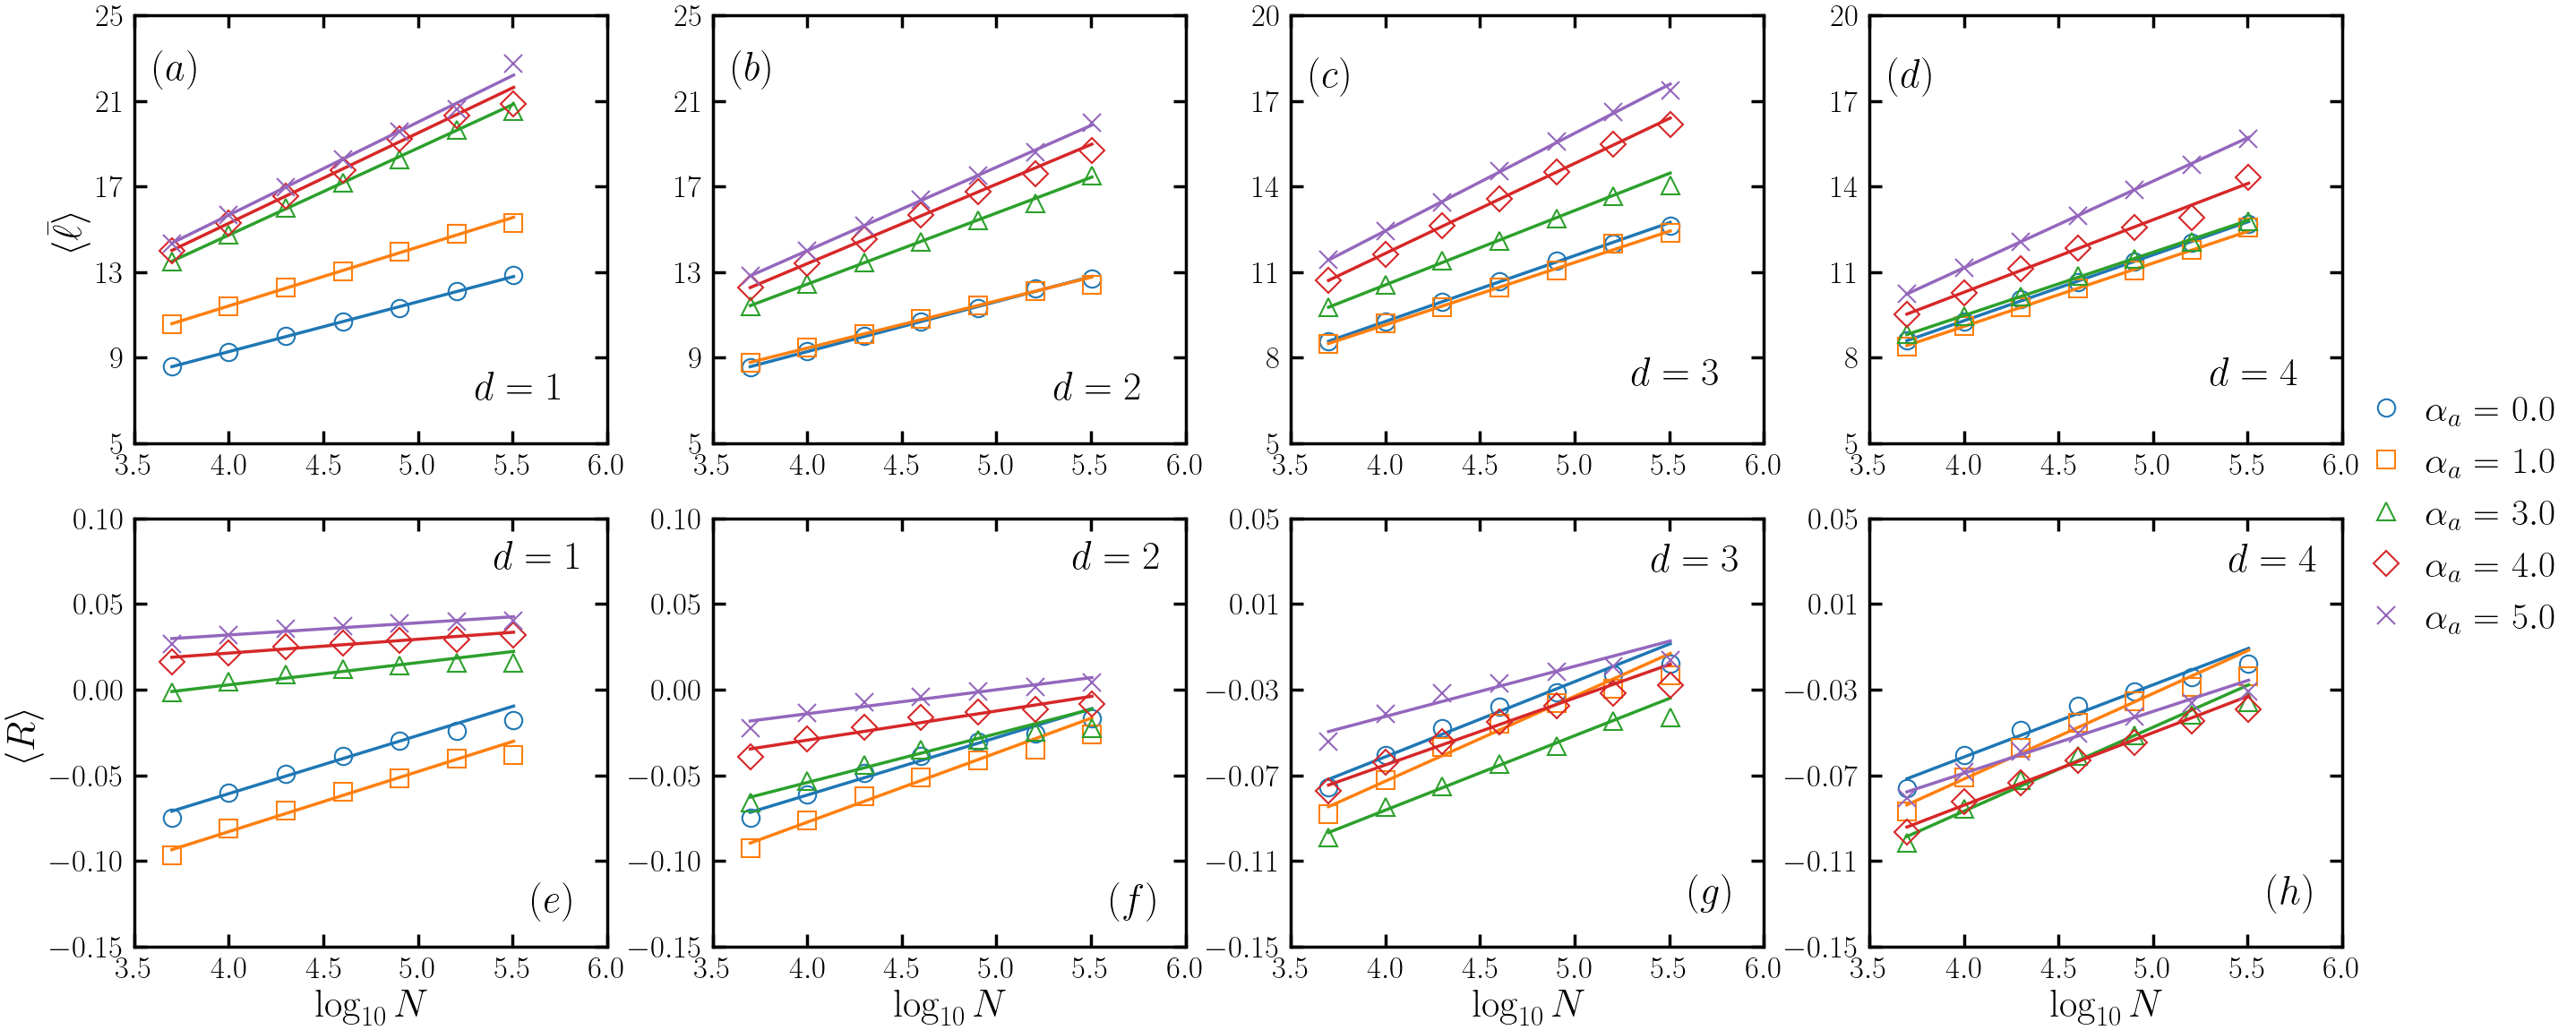

In [63]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Parâmetros de plotagem
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter_plot = [0.0, 1.0, 3.0, 4.0, 5.0]
dimensions = [1, 2, 3, 4]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
markers = ['o', 's', '^', 'D', 'x']
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$", "$(e)$", "$(f)$", "$(g)$", "$(h)$"]

markersize = 14
thickness_axes = 2.5
fontsize_labels = 32
fontsize_legend = 30
fontsize_ticks = 25
fontsize_panel = 32
mew = 1.5

# Ticks manuais fixos por subplot
yticks_ell = {
    0: np.linspace(5, 25, 6),
    1: np.linspace(5, 25, 6),
    2: np.linspace(5, 20, 6),
    3: np.linspace(5, 20, 6),
}

yticks_R = {
    0: np.linspace(-0.15, 0.10, 6),
    1: np.linspace(-0.15, 0.10, 6),
    2: np.linspace(-0.15, 0.05, 6),
    3: np.linspace(-0.15, 0.05, 6),
}

# Criação da figura
fig, axes = plt.subplots(2, 4, figsize=(30, 12))
axes = axes.flatten()
count_box = 0

# Tipos de métrica: primeira linha 'short_mean', segunda linha 'ass_coeff_mean'
for plot_type in ["short_mean", "ass_coeff_mean"]:
    for dim_idx, dim in enumerate(dimensions):
        count = 0
        ax = axes[count_box]

        for alpha in alpha_filter_plot:
            N_aux, prop, prop_err = [], [], []
            for n in N:
                df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
                df_filtered = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
                if not df_filtered.empty:
                    N_aux.append(n)
                    prop.append(df_filtered[plot_type].tolist()[0])
                    err_col = "short_err" if plot_type == "short_mean" else "ass_coeff_err"
                    prop_err.append(df_filtered[err_col].tolist()[0])

            if N_aux:
                regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=False)
                ax.plot(np.log10(N_aux), prop, linestyle='None', marker=markers[count], mew=mew,
                        markersize=markersize, label=rf"$\alpha_a$ $=$ ${alpha}$")
                ax.plot(np.log10(N_aux), regression, color=colors[count], linewidth=thickness_axes, label="_nolegend_")
            count += 1

        # Ajustes específicos para cada tipo de métrica
        if plot_type == "short_mean":
            x_p, x_p_d = 3.6, 5.3
            y_p = 22 if dim_idx < 2 else 17.5
            y_p_d = 7
            ax.set_ylim([5, 25] if dim_idx < 2 else [5, 20])
            ax.set_yticks(yticks_ell[dim_idx])

            if count_box == 0:
                ax.set_ylabel(r"$\langle \bar{\ell} \rangle$", fontsize=fontsize_labels)
            if count_box >= 4:
                ax.set_xlabel(r"$\log_{10}(N)$", fontsize=fontsize_labels)
        else:
            x_p, x_p_d = 5.6, 5.4
            y_p = -0.13
            y_p_d = 0.070 if dim_idx < 2 else 0.025
            ax.set_ylim([-0.15, 0.10] if dim_idx < 2 else [-0.15, 0.05])
            ax.set_yticks(yticks_R[dim_idx])

            if count_box == 4:
                ax.set_ylabel(r"$\langle R \rangle$", fontsize=fontsize_labels)
            ax.set_xlabel(r"$\log_{10}N$", fontsize=fontsize_labels)

        # Comum a todos
        ax.set_xlim([3.5, 6])
        ax.text(x=x_p, y=y_p, s=lab[count_box], fontsize=fontsize_panel, color="black")
        ax.text(x=x_p_d, y=y_p_d, s=f"$d = {dim}$", fontsize=fontsize_panel, color="black")
        ax.tick_params(axis='both', which='major', direction='in', length=10, width=thickness_axes, labelsize=fontsize_ticks)
        ax.tick_params(axis='both', which='minor', direction='in', length=7, width=thickness_axes, labelsize=fontsize_ticks)
        for spine in ax.spines.values():
            spine.set_linewidth(thickness_axes)

        count_box += 1

# Legenda comum
fig.legend([rf"$\alpha_a$ $=$ ${alpha}$" for alpha in alpha_filter_plot],
           loc='center left', bbox_to_anchor=(0.87, 0.5), prop={"size": fontsize_legend},handletextpad=0.05,alignment='center')

# Ajuste de layout e salvamento
plt.tight_layout()
plt.subplots_adjust(right=0.88)
plt.savefig("../../results/N/combined_short_R_linear_N.png", dpi=300)
plt.show()


## CALCULATE LINEAR COEFFICIENT VERSUS $\alpha_a$

In [61]:
# Linear Regression calculate
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
alpha_filter = [0.0, 1.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0]
dimensions = [1, 2, 3, 4]

coeff_all = {"alpha_a":[], "alpha_g":[], "dim":[], 
             "A_ass":[], "A_ass_err":[], "B_ass":[], "B_ass_err":[],
             "A_diameter":[], "A_diameter_err":[], "B_diameter":[], "B_diameter_err":[],
             "A_short":[], "A_short_err":[], "B_short":[], "B_short_err":[]}

properties = ["ass", "diameter", "short"]

# Loop sobre cada dimensão e gera o gráfico correspondente
for dim_idx, dim in enumerate(dimensions):
        
    ax = axes[dim_idx]  # Seleciona o subplot correspondente
    for alpha in alpha_filter:
        N_aux = []
        prop = []
        prop_err = []
        
        for j in range(len(properties)):
            # Loop sobre os diferentes valores de N
            for n in N:
                # Filtra o DataFrame para a dimensão, valor de N, alpha_g e alpha_a específicos
                df_dim = df[(df['dim'] == dim) & (df['N'] == n)]
                df_dim_alpha_a = df_dim[(df_dim["alpha_g"] == 2) & (df_dim["alpha_a"] == alpha)]
                
                # Adiciona os dados ao gráfico
                if not df_dim_alpha_a.empty:  # Verifica se o filtro retornou dados
                    N_aux.append(n)
                    if(properties[j]=="ass"):
                        prop_name = "ass_coeff_mean"
                        prop_name_err = "ass_coeff_err"
                    
                    elif(properties[j]=="diameter"):
                        prop_name = "diameter_mean"
                        prop_name_err = "diameter_err"
                    
                    elif(properties[j]=="short"):
                        prop_name = "short_mean"
                        prop_name_err = "short_err"
                    
                    prop.append(df_dim_alpha_a[prop_name].tolist()[0])
                    prop_err.append(df_dim_alpha_a[prop_name_err].tolist()[0])

            regression = linear_regression(np.log(N_aux), np.array(prop), np.array(prop_err), Parameter=True)
                
            coeff_all[f"A_{properties[j]}"].append(regression[0])
            coeff_all[f"B_{properties[j]}"].append(regression[1])
            coeff_all[f"A_{properties[j]}_err"].append(regression[2])
            coeff_all[f"B_{properties[j]}_err"].append(regression[3])
            
        coeff_all["alpha_a"].append(alpha)
        coeff_all["dim"].append(dim)
        coeff_all["alpha_g"].append(2)

df_coeff = pd.DataFrame(data=coeff_all)
df_coeff.to_csv("../../data/coeff_linear.txt", sep=' ', index=False)
df_coeff.head()

,alpha_a,alpha_g,dim,A_ass,A_ass_err,B_ass,B_ass_err,A_diameter,A_diameter_err,B_diameter,B_diameter_err,A_short,A_short_err,B_short,B_short_err
0,0.0,2,1,0.014757,0.001106,-0.196697,0.010589,0.014369,0.059029,-0.191748,0.565066,0.012576,0.077094,-0.168997,0.737982
1,1.0,2,1,0.015235,0.001110,-0.223264,0.010921,0.014734,0.058307,-0.216749,0.573596,0.012880,0.070767,-0.193168,0.696151
2,3.0,2,1,0.005633,0.000556,-0.049105,0.005068,0.005449,0.033685,-0.047033,0.307207,0.004551,0.047315,-0.036816,0.431517
3,4.0,2,1,0.003513,0.000498,-0.011045,0.005158,0.003424,0.016163,-0.010022,0.167301,0.002915,0.024064,-0.004158,0.249079
4,5.0,2,1,0.003067,0.000505,0.003671,0.005302,0.003003,0.013552,0.004417,0.142206,0.002607,0.020786,0.009058,0.218119


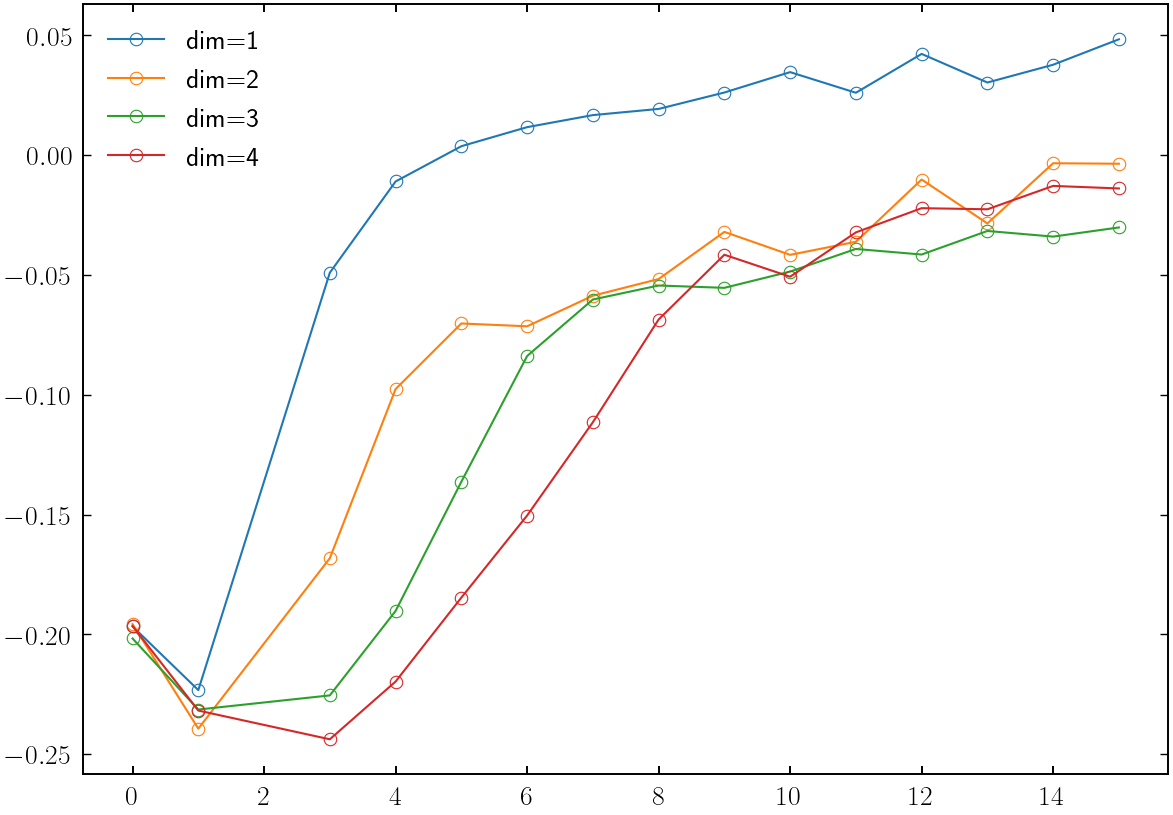

In [74]:
for d in [1,2,3,4]:
    df_d = df_coeff[df_coeff["dim"]==d]
    plt.plot(df_d["alpha_a"], df_d["B_ass"],'o-',label=f'dim={d}')
plt.legend()
plt.show()

## PLOT TO UNIQUE N VALUE ($N$ $=$ $160000$) WITH $\alpha_g$ $=$ $2.0$

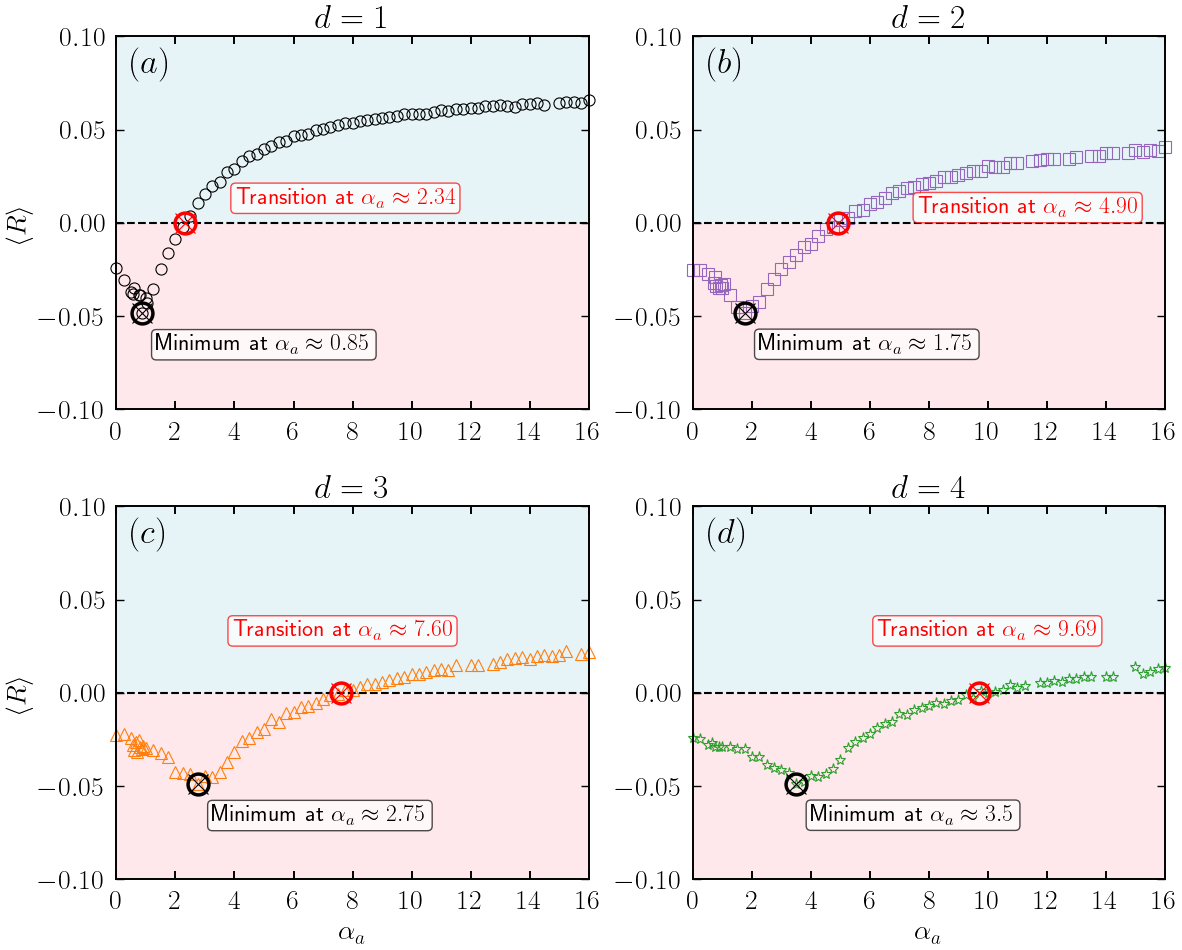

In [16]:
# Configuração inicial
N = 160000
dimensions = [1, 2, 3, 4]
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()
linestyles = ['-' for _ in range(len(dimensions))]
labels = [f"d = {dim}" for dim in dimensions]
markersize = 8
markers = ['o', 's', '^', '*']
colors = ['#000000', '#9467bd', '#ff7f0e', '#2ca02c']
lab = ["$(a)$", "$(b)$", "$(c)$", "$(d)$"]
j = 0
pos_aux = 0
pos_int = [(4.036022064786841, 0.01), (7.623711040778039, 0.005), (7.6606537152484435,0.03), (9.978414032555996, 0.03)]

for dim_idx, dim in enumerate(dimensions):
        axes[dim_idx].axhspan(0, 0.10, facecolor='lightblue', alpha=0.3)  # Azul na parte superior
        axes[dim_idx].axhspan(-0.10, 0, facecolor='lightpink', alpha=0.3)  # Rosa na parte inferior
        ax = axes[dim_idx]
        df_dim = df[(df['dim'] == dim) & (df['N'] == N)]
        df_dim_alpha_a = df_dim[df_dim["alpha_g"] == 2]
        df_ord = df_dim_alpha_a.sort_values(by="alpha_a")
        
        min_row = df_ord.loc[df_ord['ass_coeff_mean'].idxmin()]
        alpha_min = min_row['alpha_a']
        value_min = min_row['ass_coeff_mean']
    
        # Adiciona marcador no ponto mínimo
        # Adiciona marcador no ponto mínimo (duplo para destacar)
        ax.plot(alpha_min, value_min, 'x', markersize=14, color='black', zorder=5, label='_nolegend_')
        ax.plot(alpha_min, value_min, marker='o', markersize=15, markerfacecolor='none',
                markeredgecolor='black', markeredgewidth=2.5, zorder=4, label='_nolegend_')


        ax.text(min(alpha_min + 0.5, 14.5), max(value_min - 0.02, -0.09),
            rf"Minimum at $\alpha_a \approx {alpha_min}$",
            fontsize=17, color='black', weight='bold',
            bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.2', alpha=0.7))
        
        # Encontra a interseção com y = 0
        x_intercept, y_intercept = find_intersection(df_ord['alpha_a'].values, df_ord['ass_coeff_mean'].values)
    
        if x_intercept is not None:
                ax.plot(x_intercept, y_intercept, 'x', markersize=14, color='red', zorder=5, label='_nolegend_')
                ax.plot(x_intercept, y_intercept, marker='o', markersize=15, markerfacecolor='none',
                markeredgecolor='red', markeredgewidth=2.5, zorder=4, label='_nolegend_')

                x_int, y_int = pos_int[pos_aux][0], pos_int[pos_aux][1]
                
                ax.text(x_int, y_int,
                        rf"Transition at $\alpha_a \approx {x_intercept:.2f}$",
                        fontsize=17, color='red', weight='bold',
                        bbox=dict(facecolor='white', edgecolor='red', boxstyle='round,pad=0.2', alpha=0.7),
                        ha='center' if dim_idx >= 2 else 'left')
                #x_it = x_intercept if dim_idx >= 2 else min(x_intercept + 0.2, 13.8)
                #y_it = y_intercept + 0.03 if dim_idx >= 2 else max(y_intercept + 0.01, -0.07)
                pos_aux += 1
        
        ax.plot(df_ord['alpha_a'], df_ord['ass_coeff_mean'], linestyle='none' ,marker=markers[j], clip_on=False,
                label=dim, markersize=markersize ,color=colors[j])
        
        ax.hlines(y=0.0, xmin=0.0, xmax=16.0, linestyle='--', color='k', label="_nolegend_")
        
        ax.text(x=0.5, y=.08, s=lab[j], fontsize=25, color="black")
        j += 1

        ax.set_xlim([0.0, 16])
        ax.set_ylim([-0.10, 0.10])
        
        
        ax.xaxis.set_major_locator(MultipleLocator(2))
        #ax.xaxis.set_minor_locator(MultipleLocator(1))
        #ax.set_xticks([0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0])
        ax.set_title(f"$d = {dim}$")
        
        if dim_idx in [2, 3]:
                ax.set_xlabel(r"$\alpha_a$")
        if dim_idx % 2 == 0:
                ax.set_ylabel(r"$\langle R \rangle$")


plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig(f"../../results/alpha_a/R_N_{N}_alpha_a.png", dpi=300)
plt.show()

## ANALYSIS OF MINIMUM AND TRANSITION

In [17]:
def find_intersections(x, y):
    """
    Encontra todas as interseções entre os pontos dados (x, y) e a reta y = 0.

    Parâmetros:
    x : array-like : Coordenadas x dos pontos de dados
    y : array-like : Coordenadas y dos pontos de dados

    Retorna:
    intersecoes : Lista de tuples [(x_intercept1, 0), (x_intercept2, 0), ...]
    """
    intersecoes = []

    # Percorre os pontos para encontrar trocas de sinal
    for i in range(len(y) - 1):
        if y[i] * y[i + 1] < 0:  # Troca de sinal indica interseção
            x1, x2 = x[i], x[i + 1]
            y1, y2 = y[i], y[i + 1]
            
            # Cálculo da interseção por interpolação linear
            x_intercept = x1 - (y1 * (x2 - x1)) / (y2 - y1)
            
            intersecoes.append((x_intercept, 0))  # Adiciona o ponto de interseção

    return intersecoes if intersecoes else None  # Retorna None se não houver interseções


In [4]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
parms_intercept = {"N":[], "dim":[], "alpha_intercept":[]}
dimensions = [1,2,3,4]

for dim in dimensions:
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i]) & (df["alpha_g"]==2.0)]
        
        df_ord = df_dim.sort_values(by="alpha_a")
        
        x = df_ord['alpha_a'].values
        y = df_ord['ass_coeff_mean'].values
        
        x_int, y_int = find_intersection(x, y)
        
        parms_intercept["N"].append(N[i])
        parms_intercept["dim"].append(int(dim))
        parms_intercept["alpha_intercept"].append(float(x_int))

In [5]:
N = [5000, 10000, 20000, 40000, 80000, 160000, 320000]

parms_min = {"N":[], "dim":[], "alpha_min":[], "R_min":[]}
dimensions = [1,2,3,4]

for dim in dimensions:
    for i in range(len(N)):
        # Filtra o DataFrame para a dimensão e valor de N desejados
        df_dim = df[(df['dim'] == dim) & (df['N'] == N[i]) & (df["alpha_g"]==2.0)]
        df_ord = df_dim.sort_values(by="alpha_a")
        
        x = df_ord['alpha_a'].values
        y = df_ord['ass_coeff_mean'].values
        
        x_min = [float(i) for i,j in zip(x,y) if j == min(y)]
        y_min = [float(j) for i,j in zip(x,y) if j == min(y)]
        
        parms_min["N"].append(N[i])
        parms_min["dim"].append(int(dim))
        parms_min["alpha_min"].append(x_min[0])
        parms_min["R_min"].append(y_min[0])

In [6]:
df_min = pd.DataFrame(data=parms_min)
df_min

,N,dim,alpha_min,R_min
0,5000,1,0.80,-0.102019
1,10000,1,0.85,-0.086724
2,20000,1,0.75,-0.075000
3,40000,1,0.85,-0.062774
4,80000,1,0.85,-0.053533
5,160000,1,0.85,-0.048563
6,320000,1,0.90,-0.042193
7,5000,2,1.70,-0.103537
8,10000,2,1.75,-0.088339
9,20000,2,1.75,-0.075704


In [7]:
df_int = pd.DataFrame(data=parms_intercept)
df_int

,N,dim,alpha_intercept
0,5000,1,3.075868
1,10000,1,2.787224
2,20000,1,2.595935
3,40000,1,2.441590
4,80000,1,2.380192
5,160000,1,2.336022
6,320000,1,2.299947
7,5000,2,7.589903
8,10000,2,6.446967
9,20000,2,5.796887


In [9]:
def fit_alpha_a_models(N_values, alpha_a_values):
    """
    Ajusta três modelos assintóticos para estimar alpha_a^∞ em função de N:

    Modelos:
      1. Power Law:
         αₐ(N) = αₐ^∞ + C / N^p
      2. Shifted Power Law:
         αₐ(N) = αₐ^∞ + A / (N + N₀)^p
      3. Logarithmic Correction:
         αₐ(N) = αₐ^∞ + A / (log(N))^p

    Retorna:
      Um dicionário com os resultados para cada modelo, incluindo:
        - 'params': parâmetros ajustados
        - 'errors': erros dos parâmetros
        - 'R2': coeficiente de determinação
        - 'AIC': Akaike Information Criterion
        - 'BIC': Bayesian Information Criterion
        - 'N_fit': valores densos de N
        - 'alpha_fit': valores ajustados
        - 'function': função do modelo
    """
    def model_exp(N, alpha_inf, C, p):
        return alpha_inf + C * np.exp(-N**p)
        
    def model_power(N, alpha_inf, C, p):
        return alpha_inf + C / (N**p)

    def model_shifted(N, alpha_inf, A, N0, p):
        with np.errstate(divide='ignore', invalid='ignore'):
            result = np.empty_like(N, dtype=np.float64)
            valid = (N + N0) > 0
            result[~valid] = np.nan
            result[valid] = alpha_inf + A / ((N[valid] + N0)**p)
            return result

    def model_log(N, alpha_inf, A, p):
        with np.errstate(divide='ignore', invalid='ignore'):
            result = np.empty_like(N, dtype=np.float64)
            valid = np.log(N) > 0
            result[~valid] = np.nan
            result[valid] = alpha_inf + A / (np.log(N[valid])**p)
            return result
            
    N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])  # número de amostras por ponto
    N_values = np.array(N_values)
    standard_error = 1 / np.sqrt(N_values*N_s)
    
    models = {
        "power": {
            "func": model_power,
            "p0": [np.min(alpha_a_values), 1e5, 1],
            "bounds": (-np.inf, np.inf),
            "k": 3
        },
        "exp": {
            "func": model_exp,
            "p0": [2., 100, .5],
            # "bounds": (-np.inf, np.inf),
            "k": 3
        },
        "shifted": {
            "func": model_shifted,
            "p0": [np.min(alpha_a_values), 1e5, 1e3, 1],
            "bounds": ([0, 0, 1e-5, 0], [np.inf, np.inf, np.inf, np.inf]),
            "k": 4
        },
        "log": {
            "func": model_log,
            "p0": [np.min(alpha_a_values), 1e5, 1],
            "bounds": (-np.inf, np.inf),
            "k": 3
        }
    }

    results = {}
    N_fit = np.linspace(np.min(N_values), np.max(N_values)*1., 100)

    for name, model in models.items():
        try:
            popt, pcov = curve_fit(model["func"], N_values, alpha_a_values, p0 = model["p0"],
                       absolute_sigma = True, sigma = standard_error, method='lm', maxfev=10000)
            perr = np.sqrt(np.diag(pcov))

            alpha_pred = model["func"](N_values, *popt)
            ss_res = np.nansum((alpha_a_values - alpha_pred)**2)
            ss_tot = np.nansum((alpha_a_values - np.nanmean(alpha_a_values))**2)
            R2 = 1 - ss_res / ss_tot

            AIC = len(N_values) * np.log(ss_res / len(N_values)) + 2 * model["k"]
            BIC = len(N_values) * np.log(ss_res / len(N_values)) + model["k"] * np.log(len(N_values))

            alpha_fit = model["func"](N_fit, *popt)

            results[name] = {
                "params": popt,
                "errors": perr,
                "R2": R2,
                "AIC": AIC,
                "BIC": BIC,
                "N_fit": N_fit,
                "alpha_fit": alpha_fit,
                "function": model["func"]
            }
        except Exception as e:
            results[name] = {"error": str(e)}
    
    return results

def round_value_and_error(value, error):
    """
    Arredonda o valor e o erro seguindo notação científica padrão:
    - Erro com 1 dígito significativo (ou 2 se começar com 1).
    - Valor arredondado para a mesma precisão decimal do erro.
    Retorna string: "valor ± erro"
    """
    if error == 0 or np.isnan(error):
        return f"{value:.4f} $±$ {error:.4f}"

    # Dígito mais significativo do erro
    exponent = int(np.floor(np.log10(abs(error))))
    mantissa = error / 10**exponent

    # Arredonda erro para 1 ou 2 dígitos significativos
    if mantissa < 1.5:
        sig_figs = 2
    else:
        sig_figs = 1

    rounded_error = round(error, -exponent + sig_figs - 1)

    # Número de casas decimais para o valor central
    decimals = max(-int(np.floor(np.log10(rounded_error))), 0)
    rounded_value = round(value, decimals)

    fmt = f".{decimals}f"
    return f"{format(rounded_value, fmt)} $±$ {format(rounded_error, fmt)}"


/tmp/ipykernel_19593/903564167.py:101: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


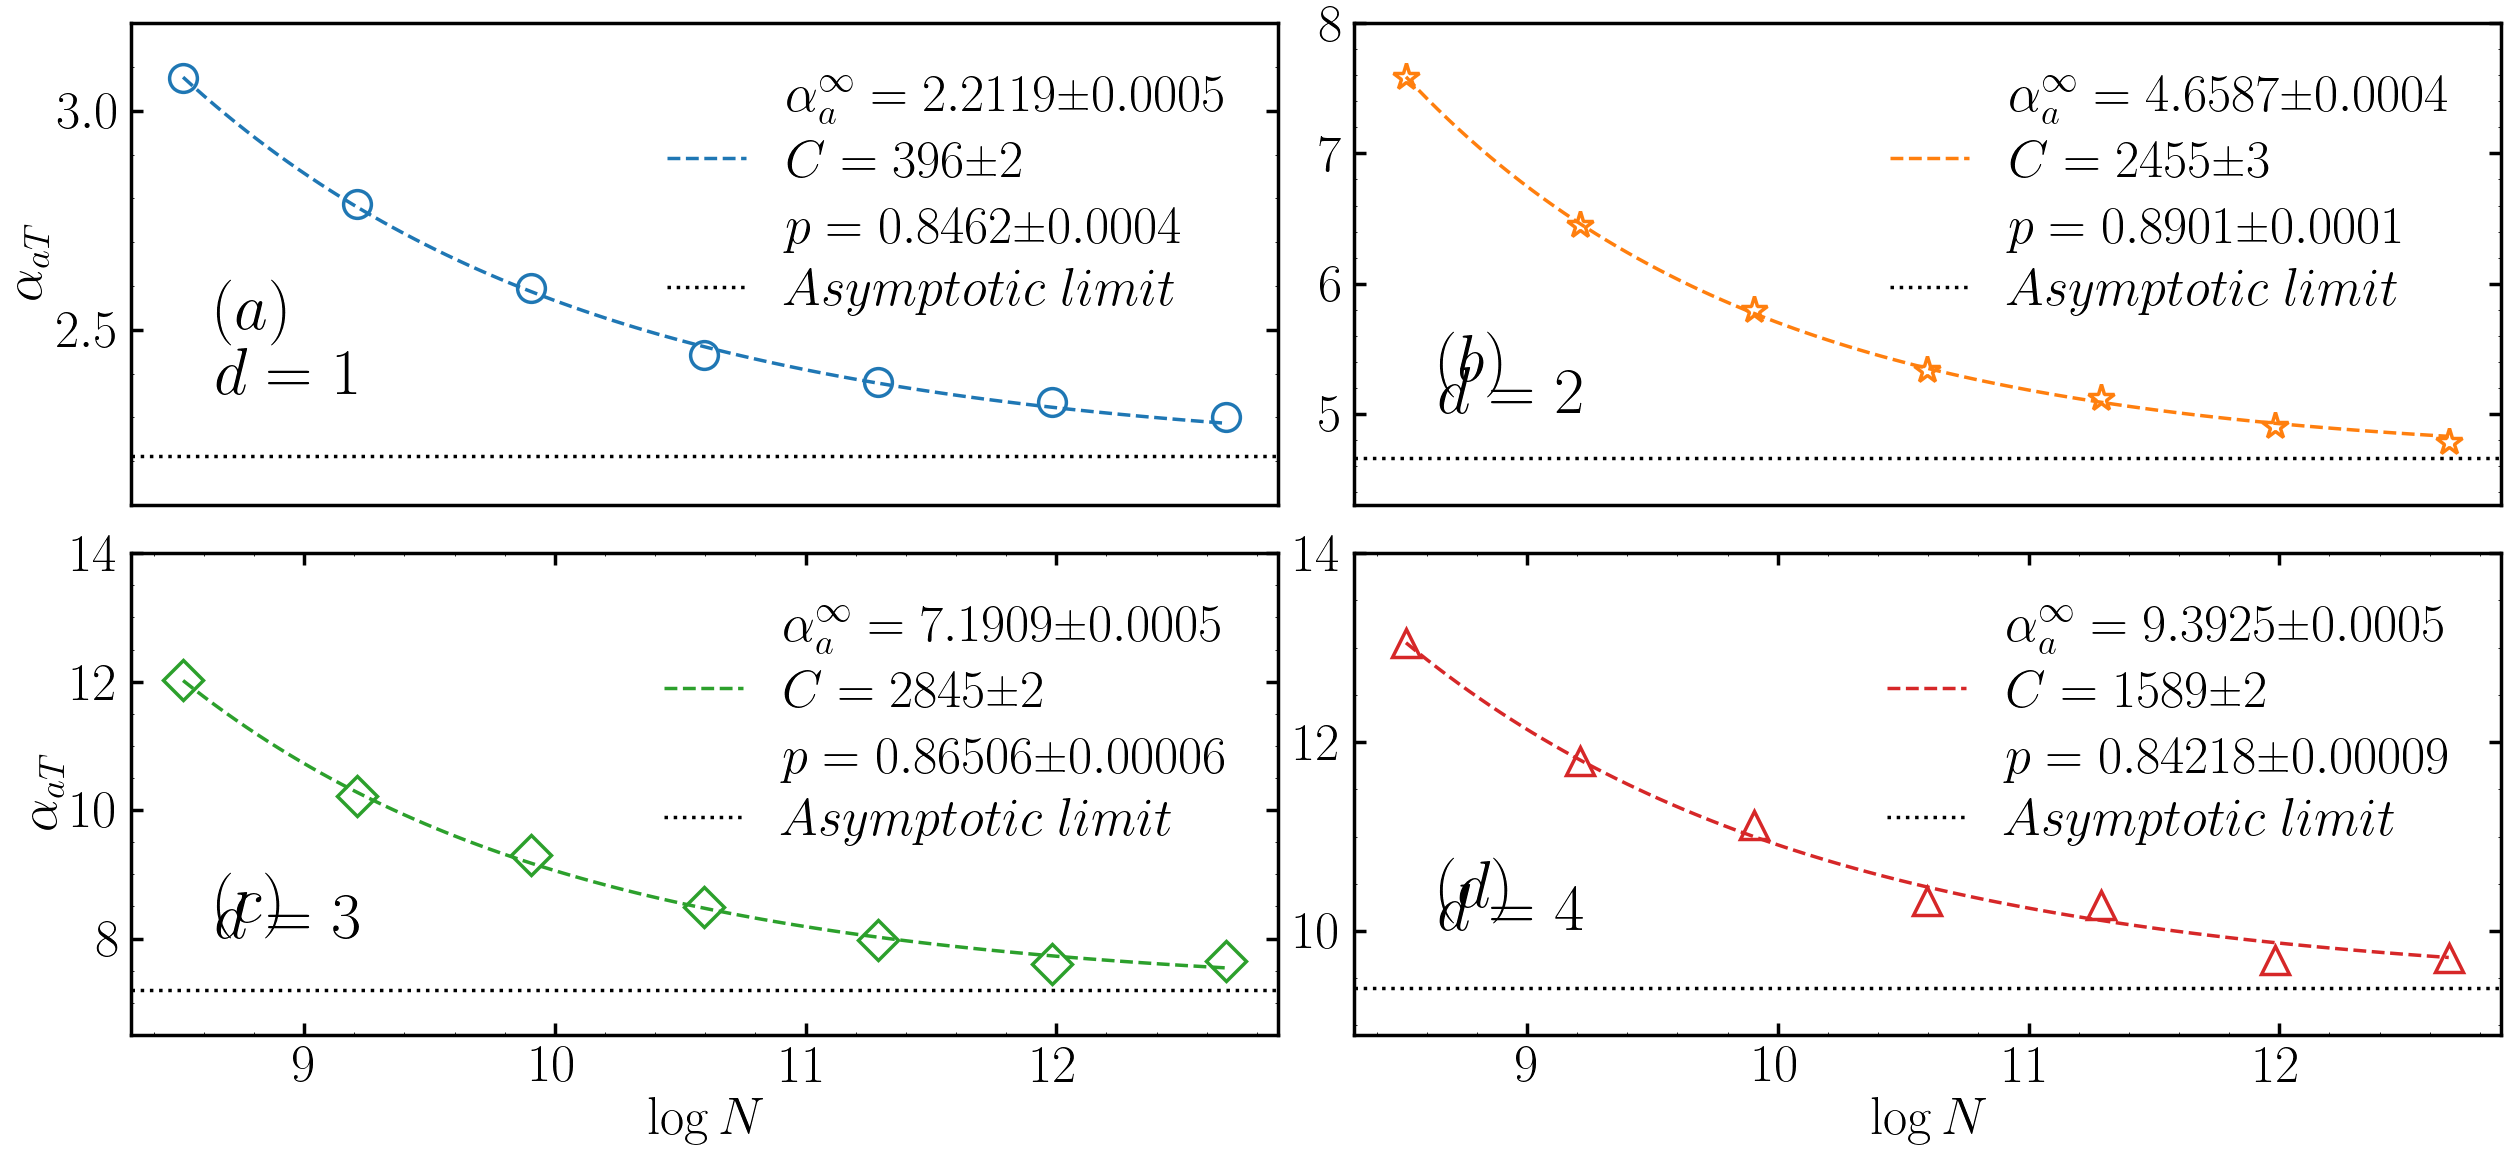

In [46]:
plt.style.use('./properties.mplstyle')
plt.rcParams.update({
    "text.latex.preamble": r"\usepackage{amsmath}"
})
plt.rcParams["text.usetex"] = True
plt.rcParams["font.family"] = "serif"
fig, axs = plt.subplots(2, 2, figsize=(30, 12), sharex=False, sharey=False, constrained_layout=True)
axs = axs.flatten()

dimensions = [1, 2, 3, 4]
norm = plt.Normalize(vmin=0, vmax=5)
cmap = cm.twilight_shifted.reversed()
N = np.array([5000, 10000, 20000, 40000, 80000, 160000, 320000])
N_s = np.array([20000, 3200, 700, 500, 200, 30, 15])

markers = {1: "o", 2: "*", 3: "D", 4: "^"}

colors = {1: "#1f77b4", 2: "#ff7f0e", 3: "#2ca02c", 4:"#d62728"}
y_limits = {1: [2.1, 3.2], 2: [4.3, 8.0], 3: [6.5, 14.0], 4:[8.9, 14.0]}
markersize = 20
mew = 2.5
thickness = 2.5
fontsize_label = 38
fontsize_ticks = 38
labelsize = 27
label_alpha = ["$(a)$", "$(b)$",
                "$(c)$", "$(d)$"]
label_dim = [f"$d = {d}$" for d in dimensions]
pos_y_dim = [2.35, 5, 8, 10]
pos_y_alpha = [2.50, 5.25, 8.25, 10.25]

count = 0

#labelsize = plt.rcParams['xtick.labelsize']

for d, ax in zip(dimensions, axs):
    color = cmap(norm(d))
    
    df_d = df_int[df_int["dim"] == d]
    N_vals = df_d["N"].values
    alpha_vals = df_d["alpha_intercept"].values
    N_vals = np.log(np.array(N_vals))

    nvalues, alpha_inf = N_vals, alpha_vals
    ax.plot(nvalues, alpha_inf, marker=markers[d],
            color='none', markeredgecolor=colors[d], markersize=markersize, mew=mew)
    
    def model_exp(x, alpha_inf, A, p):
        return alpha_inf + A * np.exp(-x**p)

    initial_guess = [2., 100, .5]
    standard_error = 1 / np.sqrt(N*N_s)
    popt, pcov = curve_fit(model_exp, nvalues, alpha_inf, p0=initial_guess,
                           absolute_sigma=True, sigma=standard_error, method='lm', maxfev=10000)
    
    xe = np.linspace(np.min(nvalues), np.max(nvalues), 100)
    y_fit = model_exp(xe, *popt)

    p_vals = popt
    err = np.sqrt(np.diag(pcov))
    alpha_txt = round_value_and_error(p_vals[0], err[0])
    C_txt     = round_value_and_error(p_vals[1], err[1])
    p_txt     = round_value_and_error(p_vals[2], err[2])

    # Legenda alinhada
    special_label = (
        r"$\begin{array}{l}"
        rf"\alpha_a^\infty = {alpha_txt} \\"
        rf"C = {C_txt} \\"
        rf"p = {p_txt} "
        r"\end{array}$"
    )

    
    ax.plot(xe, y_fit, '--', linewidth=2.5, color=colors[d], label=special_label)
    
    ax.text(x=8.65, y=pos_y_alpha[count], s=label_alpha[count], fontsize=1.25*fontsize_ticks, color="black")
    ax.text(x=8.65, y=pos_y_dim[count], s=label_dim[count], fontsize=1.25*fontsize_ticks, color="black")
    
    ax.axhline(y=p_vals[0], color='black', linestyle=":", alpha=1, label=r'$Asymptotic$ $limit$',linewidth=2.5)
    ax.set_ylim(y_limits[d])
    count += 1
for ax in axs:
    if ax in [axs[0], axs[2]]:
        ax.set_ylabel(r"$\alpha_{aT}$", fontsize=fontsize_label)
    if ax in [axs[2], axs[3]]:
        ax.set_xlabel(r'$\log{N}$', fontsize=fontsize_label)
    else:
        ax.set_xticks([])
    
    ax.minorticks_on()
    ax.tick_params(axis='both', labelsize=fontsize_ticks, width=thickness, length = 8.5)
    ax.legend(numpoints=1, borderpad=0.5, handlelength=1.5, handletextpad=0.7, labelspacing=0.3, 
              loc=1, fancybox=True, framealpha=0, shadow=False, facecolor="white", 
              fontsize=fontsize_ticks, ncol=1)

    # Define a espessura das bordas
    for spine in ax.spines.values():
        spine.set_linewidth(thickness)

plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.savefig('../../results/alpha_transition.svg',dpi = 300)
plt.show()

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('./properties.mplstyle')
plt.rcParams.update({
    "text.latex.preamble": r"\usepackage{amsmath}"
})


sns.set_style("white")  # Estilo clean sem grid

# --- Dados
dim = np.array(parms['dim'])
alpha = np.array(parms['alpha_T'])
alpha_err = np.array(parms['alpha_T_err'])

fig, ax = plt.subplots(figsize=(14, 10), constrained_layout=True)

# --- Scatter plot com marcadores vazados
sns.scatterplot(
    x=dim, y=alpha,
    s=120,
    facecolors='none',
    edgecolor='black',
    marker='o',
    linewidth=1.4,
    ax=ax,
)

# --- Ajuste linear
x_fit = np.linspace(min(dim), max(dim), 100)
y_fit = a * x_fit + b

# --- Cálculo do intervalo de confiança (erro propagado)
y_err = np.sqrt((x_fit * a_err)**2 + b_err**2)

# --- Linha do ajuste
ax.plot(
    x_fit, y_fit,
    linestyle='--',
    color='blue',
    linewidth=1.4,
    label=rf"$a = {a:.2f} \pm {a_err:.2f}, \quad b = {b:.2f} \pm {b_err:.1f}$"
)

# --- Região sombreada: intervalo de confiança
ax.fill_between(
    x_fit,
    y_fit - y_err,
    y_fit + y_err,
    color='blue',
    alpha=0.1,
)

# --- Ajustes finais
ax.set_xlabel(r"$d$", fontsize=20)
ax.set_ylabel(r"$\alpha_{aT}^\infty$", fontsize=20)
ax.set_xlim(min(dim) - 0.5, max(dim) + 0.5)
ax.set_ylim(min(alpha) - 1, max(alpha) + 1)

# Sem grid
ax.grid(False)

# Estilo da legenda
ax.legend(
    numpoints=1,
    borderpad=0.5,
    handlelength=1.5,
    handletextpad=0.7,
    labelspacing=0.3,
    loc="best",
    fancybox=True,
    framealpha=0,
    shadow=False,
    facecolor="white",
    fontsize=20
)
ax.tick_params(axis='both', which='both', direction='in', length=8, width=1.4, labelsize=20)
ax.tick_params(top=True, right=True, left=True, bottom=True)


plt.tight_layout()
plt.savefig("../../results/d_alpha_a_infty.pdf")
plt.show()


NameError: name 'parms' is not defined

In [119]:
def round_value_and_error(value, error):
    """
    Arredonda o valor e o erro seguindo notação científica padrão:
    - Erro com 1 dígito significativo (ou 2 se começar com 1).
    - Valor arredondado para a mesma precisão decimal do erro.
    Retorna string: "valor ± erro"
    """
    if error == 0 or np.isnan(error):
        return f"{value:.4f} $±$ {error:.4f}"

    # Dígito mais significativo do erro
    exponent = int(np.floor(np.log10(abs(error))))
    mantissa = error / 10**exponent

    # Arredonda erro para 1 ou 2 dígitos significativos
    if mantissa < 1.5:
        sig_figs = 2
    else:
        sig_figs = 1

    rounded_error = round(error, -exponent + sig_figs - 1)

    # Número de casas decimais para o valor central
    decimals = max(-int(np.floor(np.log10(rounded_error))), 0)
    rounded_value = round(value, decimals)

    fmt = f".{decimals}f"
    return f"{format(rounded_value, fmt)} $±$ {format(rounded_error, fmt)}"


In [120]:
import numpy as np
from scipy.optimize import curve_fit

def fit_models(x, y):
    """
    Ajusta quatro modelos aos dados x (N) e y (R_min), considerando que os valores de y são negativos.

    Modelos:
      1. Decaimento Hiperbólico:
         R_min(N) = R_inf + B / (N + C)
      
      2. Lei de potência com limite assintótico:
         R_min(N) = R_inf + (R0 - R_inf) * N^(-gamma)
      
      3. Modelo exponencial:
         R_min(N) = R_inf + (R0 - R_inf) * exp(-k * N)

      4. Stretched Exponential:
         R_min(N) = R_inf + (R0 - R_inf) * exp(-(k * N)^gamma)

    Retorna um dicionário contendo, para cada modelo:
      - 'params': os parâmetros ajustados,
      - 'errors': os erros dos parâmetros,
      - 'R2': o coeficiente de determinação,
      - 'N_fit': valores densos de x para plotagem,
      - 'R_fit': valores do modelo ajustado para N_fit,
      - 'function': a função do modelo.
    """
    
    def model1(N, R_inf, B, C):
        return R_inf + B / (N + C)

    def model2(N, R_inf, R0, gamma):
        return R_inf + (R0 - R_inf) * N**(-gamma)

    def model3(N, R_inf, R0, k):
        return R_inf + (R0 - R_inf) * np.exp(-k * N)

    def model5(N, R_inf, R0, k, gamma):
        return R_inf + (R0 - R_inf) * np.exp(- (k * N)**gamma)

    results = {}
    x_fit = np.linspace(np.min(x), np.max(x), 100)

    # Modelo 1
    p0_1 = [np.min(y), 0.1, np.median(x)]
    bounds_1 = ([-np.inf, -np.inf, 1e-10], [np.inf, np.inf, np.inf])
    popt1, pcov1 = curve_fit(model1, x, y, p0=p0_1, bounds=bounds_1, maxfev=10000)
    perr1 = np.sqrt(np.diag(pcov1))
    y_fit1_dense = model1(x_fit, *popt1)
    R2_1 = 1 - np.sum((y - model1(x, *popt1))**2) / np.sum((y - np.mean(y))**2)
    results['model1'] = {
        'params': popt1,
        'errors': perr1,
        'R2': R2_1,
        'N_fit': x_fit,
        'R_fit': y_fit1_dense,
        'function': model1
    }

    # Modelo 2
    p0_2 = [np.min(y), np.max(y), 0.5]
    popt2, pcov2 = curve_fit(model2, x, y, p0=p0_2, maxfev=10000)
    perr2 = np.sqrt(np.diag(pcov2))
    y_fit2_dense = model2(x_fit, *popt2)
    R2_2 = 1 - np.sum((y - model2(x, *popt2))**2) / np.sum((y - np.mean(y))**2)
    results['model2'] = {
        'params': popt2,
        'errors': perr2,
        'R2': R2_2,
        'N_fit': x_fit,
        'R_fit': y_fit2_dense,
        'function': model2
    }

    # Modelo 3
    p0_3 = [np.min(y), np.max(y), 1e-5]
    popt3, pcov3 = curve_fit(model3, x, y, p0=p0_3, maxfev=10000)
    perr3 = np.sqrt(np.diag(pcov3))
    y_fit3_dense = model3(x_fit, *popt3)
    R2_3 = 1 - np.sum((y - model3(x, *popt3))**2) / np.sum((y - np.mean(y))**2)
    results['model3'] = {
        'params': popt3,
        'errors': perr3,
        'R2': R2_3,
        'N_fit': x_fit,
        'R_fit': y_fit3_dense,
        'function': model3
    }

    # Modelo 5
    p0_5 = [np.min(y), np.max(y), 1e-5, 0.5]
    bounds_5 = ([-np.inf, -np.inf, 0, 0], [0, 0, 1, 1.5])
    popt5, pcov5 = curve_fit(model5, x, y, p0=p0_5, bounds=bounds_5, maxfev=20000)
    perr5 = np.sqrt(np.diag(pcov5))
    y_fit5_dense = model5(x_fit, *popt5)
    R2_5 = 1 - np.sum((y - model5(x, *popt5))**2) / np.sum((y - np.mean(y))**2)
    results['model5'] = {
        'params': popt5,
        'errors': perr5,
        'R2': R2_5,
        'N_fit': x_fit,
        'R_fit': y_fit5_dense,
        'function': model5
    }

    return results


In [31]:
def round_value_and_error(valor, erro):
    if erro == 0 or np.isnan(erro):
        return f"{valor:.4f} ± {erro:.4f}"

    casas = max(0, -int(np.floor(np.log10(abs(erro)))))
    if erro < 0.01:
        casas += 1
    if erro < 1e-4:
        casas = 5

    erro_ajustado = round(erro, casas)
    valor_ajustado = round(valor, casas)

    return f"{valor_ajustado:.{casas}f} ± {erro_ajustado:.{casas}f}"


def tabela_parametros_modelos(x, y):
    """
    Ajusta todos os modelos com fit_models e imprime uma tabela com parâmetros ± erro.
    """
    resultados = fit_models(x, y)
    
    for nome_modelo, resultado in resultados.items():
        if 'error' in resultado:
            print(f"\n⚠️ Modelo {nome_modelo} falhou: {resultado['error']}")
            continue

        print(f"\n🔹 {nome_modelo.upper()} (R² = {resultado['R2']:.5f})")
        print("-" * 40)
        params = resultado["params"]
        errors = resultado["errors"]
        for i, (param, erro) in enumerate(zip(params, errors), 1):
            print(f"Parâmetro {i}: {round_value_and_error(param, erro)}")


In [32]:
# Supondo que você já tenha:
df_d = df_min[df_min["dim"] == 4]
N, R_min = df_d["N"].values, df_d["R_min"].values

tabela_parametros_modelos(N, R_min)



🔹 MODEL1 (R² = 0.98692)
----------------------------------------
Parâmetro 1: -0.0387 ± 0.0031
Parâmetro 2: -1400 ± 352
Parâmetro 3: 17730 ± 5322

🔹 MODEL2 (R² = 0.99803)
----------------------------------------
Parâmetro 1: 0.00 ± 0.01
Parâmetro 2: -0.6 ± 0.2
Parâmetro 3: 0.22 ± 0.04

🔹 MODEL3 (R² = 0.95811)
----------------------------------------
Parâmetro 1: -0.0453 ± 0.0039
Parâmetro 2: -0.1063 ± 0.0068
Parâmetro 3: 0.00003 ± 0.00001

🔹 MODEL5 (R² = 0.99747)
----------------------------------------
Parâmetro 1: -0.02 ± 0.04
Parâmetro 2: -1 ± 7
Parâmetro 3: 1 ± 52
Parâmetro 4: 0.1 ± 0.3


In [122]:
import numpy as np
from scipy.optimize import curve_fit

def fit_models_extended(x, y):
    """
    Ajusta quatro novos modelos aos dados x (N) e y (R_min).

    Modelos:
    - Modelo 4: Logarítmico com correção de potência
    - Modelo 5: Stretched Exponential (duplo expoente)
    - Modelo 6: Função racional
    - Modelo 7: Sigmoide modificado (Hill-like)

    Retorna um dicionário com os mesmos campos do fit_models original.
    """
    
    # Modelo 4: Log corrigido com potência
    def model4(N, R_inf, A, gamma):
        return R_inf + A / (np.log(N + 1)**gamma)
    
    # Modelo 5: Stretched exponential
    def model5(N, R_inf, R0, k, gamma):
        return R_inf + (R0 - R_inf) * np.exp(- (k * N)**gamma)
    
    # Modelo 6: Função racional
    def model6(N, A, B, C, D):
        return (A + B * N) / (1 + C * N + D * N**2)
    
    results = {}
    x_fit = np.linspace(np.min(x), np.max(x), 200)

    # Modelo 4
    p0_4 = [np.min(y), 0.1, 1]
    popt4, pcov4 = curve_fit(model4, x, y, p0=p0_4, maxfev=10000)
    perr4 = np.sqrt(np.diag(pcov4))
    y_fit4 = model4(x, *popt4)
    R2_4 = 1 - np.sum((y - y_fit4)**2) / np.sum((y - np.mean(y))**2)
    results["model4"] = {
        'params': popt4,
        'errors': perr4,
        'R2': R2_4,
        'N_fit': x_fit,
        'R_fit': model4(x_fit, *popt4),
        'function': model4
    }

    # Modelo 5
    p0_5 = [np.min(y), np.max(y), 1e-5, 0.5]
    popt5, pcov5 = curve_fit(model5, x, y, p0=p0_5, bounds=([-np.inf, -np.inf, 0, 0], [0, 0, 1, 1.5]), maxfev=20000)
    perr5 = np.sqrt(np.diag(pcov5))
    y_fit5 = model5(x, *popt5)
    R2_5 = 1 - np.sum((y - y_fit5)**2) / np.sum((y - np.mean(y))**2)
    results["model5"] = {
        'params': popt5,
        'errors': perr5,
        'R2': R2_5,
        'N_fit': x_fit,
        'R_fit': model5(x_fit, *popt5),
        'function': model5
    }

    # Modelo 6
    p0_6 = [-0.1, 0, 0, 0]
    popt6, pcov6 = curve_fit(model6, x, y, p0=p0_6, maxfev=10000)
    perr6 = np.sqrt(np.diag(pcov6))
    y_fit6 = model6(x, *popt6)
    R2_6 = 1 - np.sum((y - y_fit6)**2) / np.sum((y - np.mean(y))**2)
    results["model6"] = {
        'params': popt6,
        'errors': perr6,
        'R2': R2_6,
        'N_fit': x_fit,
        'R_fit': model6(x_fit, *popt6),
        'function': model6
    }

    return results


In [35]:
def fit_all_models(x, y):
    """
    Ajusta todos os 7 modelos aos dados x e y.
    Retorna um dicionário com os resultados.
    """

    from scipy.optimize import curve_fit
    import numpy as np

    # Definição dos modelos
    def model1(N, R_inf, B, C):
        return R_inf + B / (N + C)

    def model2(N, R_inf, R0, gamma):
        return R_inf + (R0 - R_inf) * N**(-gamma)

    def model3(N, R_inf, R0, k):
        return R_inf + (R0 - R_inf) * np.exp(-k * N)

    def model4(N, R_inf, A, gamma):
        return R_inf + A / (np.log(N + 1)**gamma)

    def model5(N, R_inf, R0, k, gamma):
        return R_inf + (R0 - R_inf) * np.exp(- (k * N)**gamma)

    def model6(N, A, B, C, D):
        return (A + B * N) / (1 + C * N + D * N**2)

    models = {
        "model1": (model1, [np.min(y), 0.1, np.median(x)], ([-np.inf, -np.inf, 1e-10], [np.inf, np.inf, np.inf])),
        "model2": (model2, [np.min(y), np.max(y), 0.5], (-np.inf, np.inf)),
        "model3": (model3, [np.min(y), np.max(y), 1e-5], (-np.inf, np.inf)),
        "model4": (model4, [np.min(y), 0.1, 1], (-np.inf, np.inf)),
        "model5": (model5, [np.min(y), np.max(y), 1e-5, 0.5], ([-np.inf, -np.inf, 0, 0], [0, 0, 1, 1.5])),
        "model6": (model6, [-0.1, 0, 0, 0], (-np.inf, np.inf)),
    }

    x_fit = np.linspace(np.min(x), np.max(x), 200)
    results = {}

    for key, (func, p0, bounds) in models.items():
        try:
            popt, pcov = curve_fit(func, x, y, p0=p0, bounds=bounds, maxfev=20000)
            perr = np.sqrt(np.diag(pcov))
            y_fit = func(x, *popt)
            R2 = 1 - np.sum((y - y_fit)**2) / np.sum((y - np.mean(y))**2)
            results[key] = {
                'params': popt,
                'errors': perr,
                'R2': R2,
                'N_fit': x_fit,
                'R_fit': func(x_fit, *popt),
                'function': func
            }
        except Exception as e:
            results[key] = {'error': str(e)}

    return results


In [36]:
def filtrar_modelos_por_Rinf(resultados):
    """
    Verifica se R_inf (primeiro parâmetro) está no intervalo [-1, 1].
    Modelos com R_inf fora desse intervalo são descartados.
    """
    modelos_filtrados = {}

    for nome, resultado in resultados.items():
        if "error" in resultado:
            print(f"{nome} descartado (erro no ajuste)")
            continue

        R_inf = resultado["params"][0]
        if R_inf < -1 or R_inf > 1:
            print(f"{nome} descartado (R_inf = {R_inf:.4f} fora do intervalo [-1, 1])")
        else:
            modelos_filtrados[nome] = resultado

    return modelos_filtrados


In [37]:
df_d = df_min[df_min["dim"] == 1]
N, R_min = df_d["N"].values, df_d["R_min"].values

todos_resultados = fit_all_models(N, R_min)
resultados_validos = filtrar_modelos_por_Rinf(todos_resultados)


In [38]:
import matplotlib.pyplot as plt

def plotar_modelos_filtrados(df_min, model_keys, model_labels, model_colors, salvar_em="all_models_filtered.pdf"):
    plt.style.use('properties.mplstyle')
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.flatten()

    N_values_plot = [5000, 10000, 20000, 40000, 80000, 160000, 320000]
    labels = [f"$N$ = {n}" for n in N_values_plot]
    markersize = 8
    dimensions = [1, 2, 3, 4]
    markers = ["o", "*", "D", "^"]

    for i, ax in enumerate(axes):
        dim = dimensions[i]

        df_d = df_min[df_min["dim"] == dim]
        N, R_min = df_d["N"].values, df_d["R_min"].values

        resultados = fit_all_models(N, R_min)
        resultados_validos = filtrar_modelos_por_Rinf(resultados)

        # Dados originais
        ax.scatter(N, R_min, marker=markers[i], s=markersize**2,
                   facecolors='none', edgecolors='black', label="data")

        for key in model_keys:
            if key in resultados_validos:
                modelo = resultados_validos[key]
                ax.plot(modelo["N_fit"], modelo["R_fit"],
                        linestyle='--', linewidth=1.5,
                        color=model_colors[key],
                        label=f"{model_labels[key]} (R²={modelo['R2']:.3f})")

                R_inf = modelo["params"][0]
                ax.axhline(y=R_inf, color=model_colors[key], linestyle=":", linewidth=1)

        ax.set_title(f"$d = {dim}$")
        if i in [2, 3]: ax.set_xlabel(r"$N$")
        if i in [0, 2]: ax.set_ylabel(r"$R_{min}$")
        #ax.set_xscale("log")
        ax.grid(True)
        ax.legend(fontsize=9)

    plt.tight_layout()
    plt.savefig(salvar_em, dpi=300)
    # plt.show()
